# 정치커뮤니케이션 데이터분석실습(GCO2014) 과제 1

## 데이터 셋



**데이터셋 1** | 뉴스 기사 중 2001~2016년의 데이터)

Source: 빅카인즈 (https://www.bigkinds.or.kr/)

2001~ 2016년: https://docs.google.com/spreadsheets/d/1NxceM8PK5jTlk7fBZe6fwrjwX7zz8-bV/edit?usp=sharing&ouid=116877286501566154255&rtpof=true&sd=true

2017 ~ 2021년: https://docs.google.com/spreadsheets/d/1nQXyp5BO4g5C7u9uhcA_0BTMASCjGIIO/edit?usp=sharing&ouid=116877286501566154255&rtpof=true&sd=true


---


**데이터셋 2** | 경찰청 음주운전 적발 현황

Source: 국가통계포털 (https://kosis.kr/)

https://drive.google.com/drive/folders/1CpGauRuLtj1f-q0PXInMpYEh2bDg-RPf?usp=sharing

---

## 1. 문제제기 및 예측

---

# 핵심 주제: 음주운전에 대한 언론의 언급 변화
**음주운전**(DUI: *Driving under Influence*)은 술이나 약물에 취한 상태에서 운전하는 행위를 말합니다. 현행 도로교통법 (2021.10.21 시행) 제 44조(술에 취한 상태에서의 운전 금지)에서는 '누구든지 술에 취한 상태에서 자동차등, 노면전차 또는 자전거를 운전하여서는 아니 된다'고 명시하고 있습니다. 도로교통공단의 자료를 참고하자면 음주운전은 운전자의 판단능력과 신체기능을 저하시키며 졸음운전으로 이어지는 경우도 많아 큰 사고를 유발할 수 있습니다.

과거에는 음주운전을 일탈이나 경범죄 정도로 치부하는 인식이 강하고 단속도 체계적이지 못해 그 심각성이 인지되지 않았습니다. 하지만 점차 주취범죄에 대한 사회적 인식이 부정적으로 변하면서 음주운전 또한 사회적으로 지탄받는 행위로 변해가고 있습니다. 따라서 해당 키워드는 시간의 흐름에 따른 인식 변화가 잘 나타나는 사회현상 중 하나일 것으로 예상하였습니다.

본 연구에서는 1) 뉴스 기사를 활용한 토픽 모델링으로 국내 언론의 음주운전에 대한 묘사 특성과 그 변화를 파악하고자 합니다. 또 2) 경찰청에서 제공하는 음주운전 적발 실태 자료를 활용하여 이러한 변화가 실제 국민들의 음주운전 행태 변화에도 영향을 주었는지 파악할 것입니다. 나아가 3) 최근 개정된 음주운전 특가법, 이른바 '제1윤창호법'의 제정 시점 전후로 기사 텍스트에 어떤 차이가 있는지 파악하고자 합니다. 


본 연구를 시행해 보면 1) 시간이 흐를수록 음주운전에 대한 처벌을 강하게 언급하고, 2) 기사 토픽마다 음주운전 실태에 상이한 영향을 줄 것이며, 3) 제1윤창호법이 제정되는 시기 동안 음주운전 처벌과 관련된 용어가 뚜렷하게 많이 사용될 것으로 예상하였습니다.

---

## 2. 데이터 수집과정 및 데이터 적합성



---
우선 빅카인즈를 통해 음주운전 관련 기사를 수집하였습니다. 2001년 1월 1일부터 2021년 10월 31일까지 11개 중앙지 (경향신문, 국민일보, 내일신문, 동아일보, 문화일보, 서울신문, 세계일보, 조선일보, 중앙일보, 한겨레, 한국일보)의 기사 중 '음주운전'이라는 키워드가 들어간 모든 기사를 사용하였습니다.
해당 원본 데이터는 총 28,483건으로 1회 다운로드 가능한 기준인 2만 건 이상이기 때문에, 2001 ~ 2016년의 기사 14,275건과 2017 ~ 2021년의 기사 14,208건 두 번으로 나누어 다운로드하였습니다.

---




In [ ]:
#드라이브에 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#판다스 설치
import pandas as pd

In [ ]:
#두 개의 분할 다운로드된 기사 호출
news_2016=pd.read_excel('/content/drive/MyDrive/PCDA/실습1/NewsResult_20010101-20161231.xlsx')
news_2021=pd.read_excel('/content/drive/MyDrive/PCDA/실습1/NewsResult_20170101-20211031.xlsx')

In [ ]:
#두 개의 파일을 하나로 병합. 컬럼이 동일하므로 별도의 조건을 지정해주지는 않았습니다.
news_all = news_2021.append(news_2016)

## 데이터 탐색적 분석


*추가적으로 사용한 외부 데이터에 대한 탐색적 분석은 맨 아래 '추가 분석'섹션에서 별도로 다루는 것이 더 적합하다고 판단하였습니다.*

**1. 데이터 형태 파악**

In [ ]:
#각 컬럼의 이름과 유형 파악
news_all.dtypes

뉴스 식별자               object
일자                    int64
언론사                  object
기고자                  object
제목                   object
통합 분류1               object
통합 분류2               object
통합 분류3               object
사건/사고 분류1            object
사건/사고 분류2            object
사건/사고 분류3            object
인물                   object
위치                   object
기관                   object
키워드                  object
특성추출(가중치순 상위 50개)    object
본문                   object
URL                  object
분석제외 여부              object
dtype: object

데이터 파악 과정에서 발견한 '운세'기사는 분석에 불필요한 기사 유형으로 판단하여, 제목에 '운세'가 포함된 아티클은 제외하였습니다.

In [ ]:
news_all = news_all[news_all["제목"].str.contains('운세') == False] #운세 제외

In [ ]:
#분석에 사용하지 않을 불필요한 컬럼은 제거
news_essential=news_all[['뉴스 식별자','일자','본문']]

In [ ]:
#컬럼명 변경
news_essential.columns=['id','date','maintext']

In [ ]:
#데이터 일부 확인 (앞부분)
news_essential.head()

,id,date,maintext
0,1.1002e+06,20211031,31일 오후 4시 서울 용산구 이태원 세계음식문화거리는 ‘핼러윈 데이’ 특수를 맞아...
1,1.1007e+06,20211031,핼러윈데이를 하루 앞둔 30일 서울 용산구 이태원의 세계음식문화거리에 많은 인파가 ...
2,1.1004e+06,20211031,핼러윈을 하루 앞둔 지난달 30일 오후 서울 용산구 이태원역 사거리와 해밀턴호텔 주...
3,1.1005e+06,20211031,"경찰, 구속영장 신청 검토\n\n\n\n핼러윈데이(30일) 전날 음주운전 신고를 받..."
4,1.1011e+06,20211031,경찰이 ‘위드 코로나’(단계적 일상회복) 시행에 따라 술자리가 잦아질 것에 대비해 ...


In [ ]:
#행과 열의 길이 파악
news_essential.shape

(28009, 3)

**2. 시계열 분석을 위해, int형으로 표현된 날짜 데이터를 datetime으로 변경해 줍니다.**

In [ ]:
#일자 컬럼을 날짜형으로 변환하기 위해 datetime 패키지 사용.
import datetime as dt
news_essential['date1'] = news_essential['date'].astype("str") #날짜를 문자형으로 변환
news_essential['date1'] = news_essential['date1'].apply(lambda x: dt.datetime.strptime(x,'%Y%m%d')) #datetime에서 제공하는 시간형 자료형으로 변환
news_essential['year-month'] = news_essential['date1'].dt.strftime('%Y-%m') # 연-월의 형식으로도 변환
news_essential['year'] = news_essential['date1'].dt.strftime('%Y') #연 형식으로 변환
news_essential['month'] = news_essential['date1'].dt.strftime('%m') # 월 형식으로 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
news_essential.head(1)[['date','date1','year-month','year','month']] #변환된 날짜 컬럼확인 

,date,date1,year-month,year,month
0,20211031,2021-10-31,2021-10,2021,10


In [ ]:
#컬럼 추가 후 정보 다시 확인
news_essential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28009 entries, 0 to 14274
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          28009 non-null  object        
 1   date        28009 non-null  int64         
 2   maintext    28009 non-null  object        
 3   date1       28009 non-null  datetime64[ns]
 4   year-month  28009 non-null  object        
 5   year        28009 non-null  object        
 6   month       28009 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.7+ MB


**3. 본 분석의 주목적은 시간의 흐름에 따른 음주운전 인식의 변화입니다. 따라서 시간의 흐름에 따른 기사 개수 추이를 시각화하여 파악합니다.**

In [ ]:
#개별 연-월을 기준으로 기사 수를 카운트
news_by_month=news_essential.groupby('year-month')['id'].count()

#그룹화 후 인덱스 초기화
news_by_month=news_by_month.reset_index()

In [ ]:
news_by_month.head(7)

,year-month,id
0,2001-01,44
1,2001-02,26
2,2001-03,50
3,2001-04,25
4,2001-05,34
5,2001-06,33
6,2001-07,41


In [ ]:
#시각화를 위한 pyplot,seaborn 패키지 설치
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'Counts'), Text(0.5, 1.0, 'freq.of articles about DUI')]

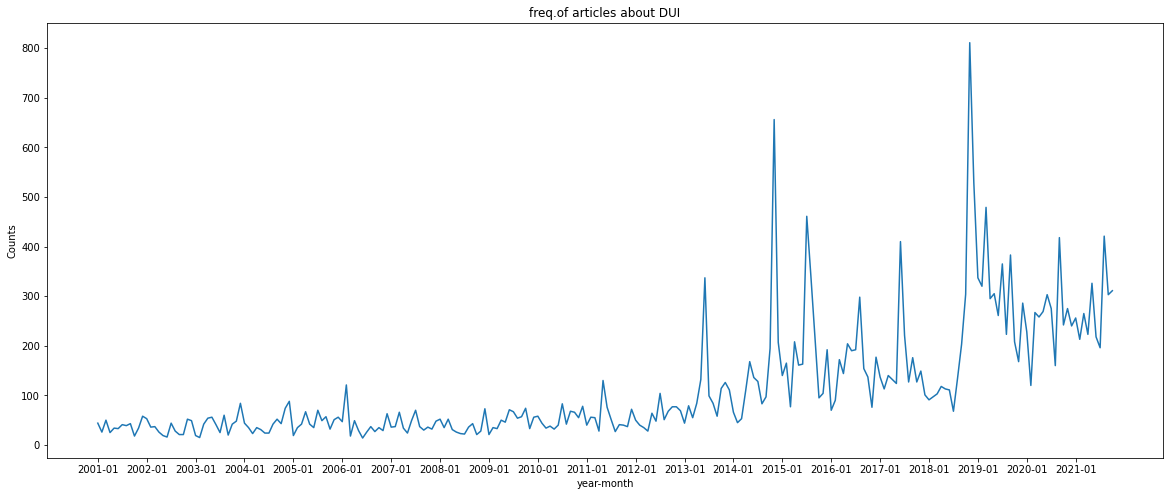

In [ ]:
plt.figure(figsize=(20,8)) #이미지 사이즈 결정
ax=sns.lineplot(x=news_by_month['year-month'],y=news_by_month['id']) #X,Y 설정하고 그래프 표현
freq=12 #X축 간격 변경하는 변수
xtix = ax.get_xticks() #X축 설정
ax.set_xticks(xtix[::freq]) #X label tick 설정
ax.set(title='freq.of articles about DUI',ylabel='Counts') #라벨 및 제목 설정

```
시각화 결과 음주운전에 대한 기사는 2012~2013년을 기점으로 월별 편차가 커지며 전반적인 증가세를 보였습니다.
```

**4. 매년 연말연시가 되면 술자리가 많아지고, 그에 따라 음주운전 건수도 증가한다는 것이 일반적인 통념입니다.**

**따라서 연도 구분 없이 월 구분만으로도 연말에 기사 수가 많아지는지 파악하고자 합니다.**

In [ ]:
#개별 연-월을 기준으로 기사 수를 카운트
news_by_month_1=news_essential.groupby('month')['id'].count()

#그룹화 후 인덱스 초기화
news_by_month_1=news_by_month_1.reset_index()

In [ ]:
news_by_month_1

,month,id
0,01,1852
1,02,1757
2,03,2098
3,04,2036
4,05,2335
5,06,2599
6,07,2632
7,08,2374
8,09,2536
9,10,2238


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


[Text(0, 0.5, 'Counts'), Text(0.5, 1.0, 'freq.of articles about DUI')]

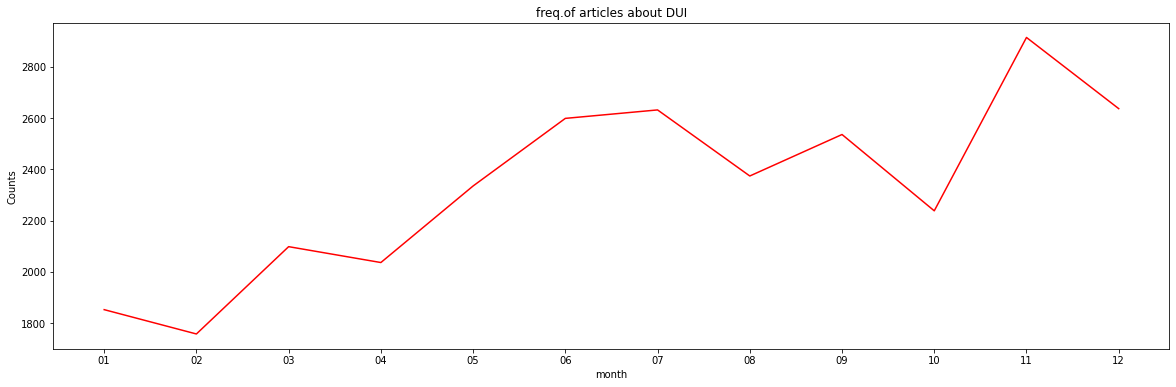

In [ ]:
plt.figure(figsize=(20,6)) #이미지 사이즈 설정
ax=sns.lineplot(x=news_by_month_1['month'],y=news_by_month_1['id'],c='r') #x, y, 색상 결정
ax.set(title='freq.of articles about DUI',ylabel='Counts') #타이틀과 라벨 설정

```
분석 결과 음주중전에 대한 기사는 11월과 12월에 가장 많이 작성되었으며, 6월과 7월이 뒤를 이었습니다.

2021년의 자료가 10월까지 집계되었음에도 이러한 결과가 도출되었음을 고려할 때  11월과 12월에 특히 많은 기사가 작성됨을 알 수 있습니다.
```


## 데이터 전처리 및 정제

```
데이터를 분석할 수 있도록 데이터를 처리하는 단계 입니다. 
```

**1. 토픽 모델링에 필요한 패키지를 설치하였습니다.**

In [ ]:
# 토픽 모델링에 필요한 타 라이브러리 설치
from tqdm import tqdm #apply진행상황
tqdm.pandas()
import re #정규표현식
from math import sqrt #계산
import numpy as np #numpy

**2. 형태소 분석기의 경우 https://github.com/bab2min/kiwipiepy 에서 제공하는 kiwi를 사용하였습니다.**

kiwi는 유사한 수준의 정확도를 가진 타 분석기 대비 속도가 빠른 편으로 알려져 있습니다.

또 각 단어에 사용자가 가중치를 부여할 수 있어 본 분석에 적합하다고 판단하였습니다.



In [ ]:
#kiwi설치
!pip install kiwipiepy

     |████████████████████████████████| 841 kB 3.4 MB/s 
     |████████████████████████████████| 26.5 MB 10.8 MB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.11.0-py3-none-any.whl size=26552558 sha256=565fe1d31c3d5ccaec22c91cc20a3070b5ae828572cd45c7a827535984d82eb4
  Stored in directory: /root/.cache/pip/wheels/99/c9/8d/87f32d82825c0739691bc02c7e3a1c6d79dbc9455f955311d4
Successfully built kiwipiepy-model


In [ ]:
#Kiwi 형태소분석기 호출
from kiwipiepy import Kiwi, Option
kiwi = Kiwi()

**3. 11주차에 사용한 코드를 활용하여 분석과 무관한 문자를 제거합니다.**

In [ ]:
pattern1 = '[-=+,#/\?:;^$.A*"~%!\\\n\r\t<>[]{}()▼▽♣♧§☆♡´∀｀ﾉ♥♡▲△�ㅁ▼▽▶▷◀◁★☆♠♤●○◎⊙◆◇■□＊━▣“”]' #특수기호 목록

In [ ]:
news_essential['maintext']=news_essential['maintext'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로

100%|██████████| 28009/28009 [00:00<00:00, 180841.23it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**4. Kiwi를 활용하여 명사만 추출하는 함수를 생성합니다.**

생성한 함수 tokenize는 PyKomoran의 get_nouns와 동일한 역할을 합니다.

In [ ]:
def tokenize(texts):
    res = kiwi.analyze(texts)[0]
    return [word
            for word, tag, _, _ in res
            if tag.startswith('NNG') or tag.startswith('NNP')]

```
* 부가설명

Kiwi는 List[Tuple[List[Tuple[형태소, 품사태그, 시작위치, 문자열길이]], 분석 점수]] 형태로 분석 결과를 출력합니다.
맨 바깥 리스트에서 res라는 변수를 생성하고(Line 1), 이를 활용하여 품사 태그가 NNG(명사) 혹은 NNP(고유명사)인 형태소만을
리스트 형태로 반환합니다(Line 2, Line 3).
참고로 Kiwi의 품사 태그는 Sejong의 것과 동일합니다.

```

**5. 분석할 데이터 중 위 3행만 추출하여, 생성한 함수가 정상적으로 작동하는지 확인하였습니다.**

In [ ]:
news_sample=news_essential.iloc[:3] #위 3행만 추출

In [ ]:
news_sample['nouns'] = news_sample['maintext'].progress_map(lambda x:tokenize(x)) #샘플 토큰화

100%|██████████| 3/3 [00:00<00:00,  7.31it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
news_sample #결과 출력

,id,date,maintext,date1,year-month,year,month,nouns
0,1.1002e+06,20211031,31일 오후 4시 서울 용산구 이태원 세계음식문화거리는 ‘핼러윈 데이’ 특수를 맞아...,2021-10-31,2021-10,2021,10,"[오후, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 핼러, 윈, 데이, ..."
1,1.1007e+06,20211031,핼러윈데이를 하루 앞둔 30일 서울 용산구 이태원의 세계음식문화거리에 많은 인파가 ...,2021-10-31,2021-10,2021,10,"[핼러윈데이, 하루, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 인파, ..."
2,1.1004e+06,20211031,핼러윈을 하루 앞둔 지난달 30일 오후 서울 용산구 이태원역 사거리와 해밀턴호텔 주...,2021-10-31,2021-10,2021,10,"[핼러윈, 하루, 지난달, 오후, 서울, 용산구, 이태원역, 사거리, 해밀턴, 호텔..."


**6. 기호 처리와 명사 추출 함수가 준비되었으므로 형태소 분석을 실시합니다.**

In [ ]:
#형태소 분석
news_essential['nouns'] = news_essential['maintext'].progress_map(lambda x:tokenize(x))

100%|██████████| 28009/28009 [04:19<00:00, 108.10it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#형태소 분석이 정상적으로 이루어졌는지 확인
news_essential.head()

,id,date,maintext,date1,year-month,year,month,nouns
0,1.1002e+06,20211031,31일 오후 4시 서울 용산구 이태원 세계음식문화거리는 ‘핼러윈 데이’ 특수를 맞아...,2021-10-31,2021-10,2021,10,"[오후, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 핼러, 윈, 데이, ..."
1,1.1007e+06,20211031,핼러윈데이를 하루 앞둔 30일 서울 용산구 이태원의 세계음식문화거리에 많은 인파가 ...,2021-10-31,2021-10,2021,10,"[핼러윈데이, 하루, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 인파, ..."
2,1.1004e+06,20211031,핼러윈을 하루 앞둔 지난달 30일 오후 서울 용산구 이태원역 사거리와 해밀턴호텔 주...,2021-10-31,2021-10,2021,10,"[핼러윈, 하루, 지난달, 오후, 서울, 용산구, 이태원역, 사거리, 해밀턴, 호텔..."
3,1.1005e+06,20211031,"경찰, 구속영장 신청 검토\n\n\n\n핼러윈데이(30일) 전날 음주운전 신고를 받...",2021-10-31,2021-10,2021,10,"[경찰, 구속, 영장, 신청, 검토, 핼러윈, 데이, 전날, 음주, 운전, 신고, ..."
4,1.1011e+06,20211031,경찰이 ‘위드 코로나’(단계적 일상회복) 시행에 따라 술자리가 잦아질 것에 대비해 ...,2021-10-31,2021-10,2021,10,"[경찰, 위드 코로나, 단계, 일상, 회복, 시행, 술자리, 대비, 강도, 음주, ..."


**7. 형태소 분석을 반복하며 토큰을 보완합니다.**

해당 과정은 크게

7-1) 일부 아이템을 랜덤하게 추출하여 확인

7-2) 정규화

7-3) 이후 형태소분석기가 처리하지 못하는 용어를 새롭게 추가

7-4) 다시 형태소분석 (**6.**)

의 과정으로 이루어집니다.

**7-1) 일부 기사를 추출하여 정상적으로 토큰화가 되었는지 확인합니다.**

- 전체 데이터의 약 2%인 550여개의 아티클을 확인하였습니다.

In [ ]:
import random #랜덤추출 위한 random패키지 호출

In [ ]:
# 아티클 랜덤추출
i = random.randint(0, len(news_essential)) #랜덤 아티클 인덱스
print("article {}".format(i)) #인덱스 번호
print(news_essential.iloc[i][['maintext','nouns']].values[0]) #기사 본문
print(news_essential.iloc[i][['maintext','nouns']].values[1]) #생성된 토큰

article 7081
국민청원인  국민 안전 위해 법규 제정 필요  일본산 수산물을 실은 활어차들이 우리나라 도심을 큰 제약 없이 활보한다는 한 언론 보도가 뒤늦게 논란이 되면서 관련법을 제정해달라는 국민청원까지 등장했다  이 국민청원은 게시 몇 시간 만에 동의인 수 7 000명을 넘어섰다  한 국민청원인은 26일 청와대 국민국민청원 게시판에 ‘한국 내 일본산 활어 유통과 일본 해수 무단 방
['국민청원', '국민', '안전', '위해', '법규', '제정', '필요', '일본', '수산물', '활어차', '우리나라', '도심', '제약', '활보', '언론', '보도', '논란', '관련', '법', '제정', '국민청원', '등장', '국민청원', '게시', '시간', '동의', '수', '국민청원', '인', '청와대', '국민', '국민청원', '게시판', '한국', '일본', '활', '유통', '일본', '해수', '무단', '방']


**7-2) 정규화한 단어는 크게 다음과 같습니다.**
1. 영어 약어가 흔히 쓰이는 경우 풀어 쓰고 이를 7-3)의 커스텀 사전에 추가하였습니다.
2. 코로나19, H1N1바이러스, 중동호흡기증후군, 중증급성호흡기증후군에 대한 명칭은 각각 코로나19, MERS, 신종인플루엔자, SARS로 통일하였습니다.
3. 인물을 지칭하는 동일한 단어의 경우, 시기가 방대하여 다른 인물을 같은 인물로 지정할 우려가 매우 높습니다. 따라서 음주운전으로 적발된 연예인의 본명 및 대통령의 경우에 한해 진행하였습니다.
(예: 해당 기간 동안 '이 총리'는 이해찬 전 총리, 이완구 전 총리, 이낙연 전 총리를 모두 지칭할 가능성이 있어 정규화가 곤란합니다.)
4. 사건 기사에서 당사자를 지칭하는 용어를 ㄱ씨,ㄴ씨,ㄷ씨,...으로 구분할 경우 형태소로 파악될 우려가 있어 A씨, B씨, C씨,...으로 통일하였습니다.
5. 통일되지 않은 지명, 도로명,법령명 등을 통일하였습니다.
6. 2000년대 초반 기사의 경우 한자 표현이 많아, 이를 한글로 고쳐 주었습니다.
7. 불필요한 영어 표현은 한글로 바꿔 주었습니다.

In [ ]:
dic_standardization = {'SNS':'소셜 네트워크 서비스','소셜 미디어':'소셜 네트워크 서비스',
                      '신종 코로나바이러스':'코로나19','우한폐렴':'코로나19','신종 플루':'신종인플루엔자','중동호흡기증후군':'메르스','MERS':'메르스','중증급성호흡기증후군':'사스',
                       '김영운':'강인','길성준':'길','최수진':'호란','김민준':'준케이','장용준':'노엘',
                       '노 대통령':'노무현 대통령','盧':'노무현 대통령','이 대통령':'이명박 대통령','박 대통령':'박근혜 대통령','문 대통령':'문재인 대통령',
                       'ㄱ씨':'A씨','ㄴ씨':'B씨','ㄷ씨':'C씨','ㄹ씨':'D씨',
                       '청원':'국민청원','고속도':'고속도로','경부선':'경부고속도로',
                       '대구시':'대구','서울특별시':'서울','울산시':'울산','대전시':'대전','광주시':'광주','부산시':'부산','광주시':'광주',
                       'KBO리그':'프로야구','교특법':'교통사고처리특례법','상벌위':'상벌위원회','선관위':'선거관리위원회','주한미군':'미군','국과수':'국립과학수사원',
                       '自業自得':'자업자득','轉禍爲福':'전화위복','捲土重來':'권토중래','鐵則':'철칙','李仁宰':'이인재','復古':'복고',
                       '金昌完':'김창완','魔':'마','熱演':'열연','曾以琳':'쩡이린','人道':'인도','誤記':'오기',
                       'clean':'클린','KIA':'기아'} #정규화 딕셔너리

In [ ]:
#정규화 딕셔너리를 활용하여 단어 교체
for old, new in dic_standardization.items():
  print("convert {} into {}.".format (old, new))
  news_essential['maintext'] = news_essential['maintext'].progress_map(lambda x:x.replace(old, new))

convert SNS into 소셜 네트워크 서비스.


100%|██████████| 28009/28009 [00:00<00:00, 528438.68it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


convert 소셜 미디어 into 소셜 네트워크 서비스.


100%|██████████| 28009/28009 [00:00<00:00, 503220.18it/s]


convert 신종 코로나바이러스 into 코로나19.


100%|██████████| 28009/28009 [00:00<00:00, 487686.28it/s]


convert 우한폐렴 into 코로나19.


100%|██████████| 28009/28009 [00:00<00:00, 455158.62it/s]


convert 신종 플루 into 신종인플루엔자.


100%|██████████| 28009/28009 [00:00<00:00, 497958.04it/s]


convert 중동호흡기증후군 into 메르스.


100%|██████████| 28009/28009 [00:00<00:00, 449123.99it/s]


convert MERS into 메르스.


100%|██████████| 28009/28009 [00:00<00:00, 457532.22it/s]


convert 중증급성호흡기증후군 into 사스.


100%|██████████| 28009/28009 [00:00<00:00, 521768.48it/s]


convert 김영운 into 강인.


100%|██████████| 28009/28009 [00:00<00:00, 534628.79it/s]


convert 길성준 into 길.


100%|██████████| 28009/28009 [00:00<00:00, 529305.34it/s]


convert 최수진 into 호란.


100%|██████████| 28009/28009 [00:00<00:00, 536496.56it/s]


convert 김민준 into 준케이.


100%|██████████| 28009/28009 [00:00<00:00, 452145.53it/s]


convert 장용준 into 노엘.


100%|██████████| 28009/28009 [00:00<00:00, 489764.16it/s]


convert 노 대통령 into 노무현 대통령.


100%|██████████| 28009/28009 [00:00<00:00, 371396.43it/s]


convert 盧 into 노무현 대통령.


100%|██████████| 28009/28009 [00:00<00:00, 396864.56it/s]


convert 이 대통령 into 이명박 대통령.


100%|██████████| 28009/28009 [00:00<00:00, 485122.61it/s]


convert 박 대통령 into 박근혜 대통령.


100%|██████████| 28009/28009 [00:00<00:00, 464074.98it/s]


convert 문 대통령 into 문재인 대통령.


100%|██████████| 28009/28009 [00:00<00:00, 416189.62it/s]


convert ㄱ씨 into A씨.


100%|██████████| 28009/28009 [00:00<00:00, 456391.09it/s]


convert ㄴ씨 into B씨.


100%|██████████| 28009/28009 [00:00<00:00, 510652.93it/s]


convert ㄷ씨 into C씨.


100%|██████████| 28009/28009 [00:00<00:00, 457903.16it/s]


convert ㄹ씨 into D씨.


100%|██████████| 28009/28009 [00:00<00:00, 546468.97it/s]


convert 청원 into 국민청원.


100%|██████████| 28009/28009 [00:00<00:00, 531869.45it/s]


convert 고속도 into 고속도로.


100%|██████████| 28009/28009 [00:00<00:00, 471984.11it/s]


convert 경부선 into 경부고속도로.


100%|██████████| 28009/28009 [00:00<00:00, 479242.94it/s]


convert 대구시 into 대구.


100%|██████████| 28009/28009 [00:00<00:00, 385268.10it/s]


convert 서울특별시 into 서울.


100%|██████████| 28009/28009 [00:00<00:00, 465105.71it/s]


convert 울산시 into 울산.


100%|██████████| 28009/28009 [00:00<00:00, 407633.21it/s]


convert 대전시 into 대전.


100%|██████████| 28009/28009 [00:00<00:00, 492786.21it/s]


convert 광주시 into 광주.


100%|██████████| 28009/28009 [00:00<00:00, 502929.35it/s]


convert 부산시 into 부산.


100%|██████████| 28009/28009 [00:00<00:00, 488584.80it/s]


convert KBO리그 into 프로야구.


100%|██████████| 28009/28009 [00:00<00:00, 522255.59it/s]


convert 교특법 into 교통사고처리특례법.


100%|██████████| 28009/28009 [00:00<00:00, 497188.82it/s]


convert 상벌위 into 상벌위원회.


100%|██████████| 28009/28009 [00:00<00:00, 567453.81it/s]


convert 선관위 into 선거관리위원회.


100%|██████████| 28009/28009 [00:00<00:00, 412606.90it/s]


convert 주한미군 into 미군.


100%|██████████| 28009/28009 [00:00<00:00, 401451.17it/s]


convert 국과수 into 국립과학수사원.


100%|██████████| 28009/28009 [00:00<00:00, 543091.34it/s]


convert 自業自得 into 자업자득.


100%|██████████| 28009/28009 [00:00<00:00, 507831.83it/s]


convert 轉禍爲福 into 전화위복.


100%|██████████| 28009/28009 [00:00<00:00, 500770.52it/s]


convert 捲土重來 into 권토중래.


100%|██████████| 28009/28009 [00:00<00:00, 525023.73it/s]


convert 鐵則 into 철칙.


100%|██████████| 28009/28009 [00:00<00:00, 559204.60it/s]


convert 李仁宰 into 이인재.


100%|██████████| 28009/28009 [00:00<00:00, 497719.64it/s]


convert 復古 into 복고.


100%|██████████| 28009/28009 [00:00<00:00, 502181.20it/s]


convert 金昌完 into 김창완.


100%|██████████| 28009/28009 [00:00<00:00, 517961.20it/s]


convert 魔 into 마.


100%|██████████| 28009/28009 [00:00<00:00, 513012.23it/s]


convert 熱演 into 열연.


100%|██████████| 28009/28009 [00:00<00:00, 512455.01it/s]


convert 曾以琳 into 쩡이린.


100%|██████████| 28009/28009 [00:00<00:00, 433013.38it/s]


convert 人道 into 인도.


100%|██████████| 28009/28009 [00:00<00:00, 456384.00it/s]


convert 誤記 into 오기.


100%|██████████| 28009/28009 [00:00<00:00, 453771.48it/s]


convert clean into 클린.


100%|██████████| 28009/28009 [00:00<00:00, 473679.74it/s]


convert KIA into 기아.


100%|██████████| 28009/28009 [00:00<00:00, 605348.98it/s]


**7-3) 커스텀으로 추가된 용어는 크게 다음과 같습니다:**
1.   음주운전 및 도로교통법을 비롯하여 범법/범죄 관련 용어 중 여러 단어가 하나의 용어로 쓰이는 경우
2.   그 외 정치 및 정부 관련 용어 중 여러 단어가 하나의 용어로 쓰이는 경우
3.   지명, 인명,자격명
4.  차량 및 차량보험, 차량보험사기 관련 용어어.
5.  코로나19 관련 용어 중 인식되지 않는 단어 및 관련 개념
6.  스포츠 선수의 음주운전 기사에 등장한 세계경기 명, 야구 구단 명
7.  기타 형태소분리가 잘 되지 않거나, 여러 단어가 묶여 쓰이는 경우






In [ ]:
word_list=['음주운전','음주단속','면허 취소 수준','면허 취소 수치','면허 취소 기준','도로교통법','알코올농도','혈중알코올농도','위드마크 공식',
           '신호위반','중앙선침법','불구속','불법체류자', '솜방망이','특정범죄가중처벌법상 위험운전 치사상 등','특정범죄가중처벌법상 위험운전치사',
           '민식이법','공무집행방해','112','영장실질심사','국민건강증진법','가출팸','선거관리위원회','국정감사',
           '보호관찰소','암행순찰차','난폭운전','과속운전','삼진아웃','윤창호법','성매매','특별사면','어린이 보호 구역',
           '손목치기','보험사기','손목치기','투스카니','비포장도로','대리운전','블랙박스','간선도로','외제차','액티언','트라제','가드레일',
           '문화체육관광부','보건복지부','교육인적자원부','국민청원','운영위원회','민주노총','프로축구연맹',
           '상벌위원회','자유한국당','새정치민주연합','정의당',
           '민주화운동','국회의원','보궐선거','업무추진비','스쿨존',
           '국방위원회','제1위원장','교문위원','국회의장','고용노동부','중앙지법','부장판사',
           '타이거 우즈','르브론 제임스','드웨인 웨이드','지만원','조대엽','콜린 퍼스','강인','박인혁','장용준','임성문','양환승','노휘찬','임현호',
           '함석천','송영무','유석철','안진웅','동아일보',
           '서울외곽순환고속도로','시실리','일도이동','상당구','용암동','들안길','서울세관',
           '자카르타 팔렘방 아시안게임','남아공월드컵','국제대회','두산베어스','넥센히어로즈','키움히어로즈','SK와이번스','LG트윈스',
           'NC다이노스','KT위즈','기아타이거즈','해태타이거즈','한화이글스','삼성라이온즈','롯데이글스',
           '안전불감증','간접흡연','부퀘스트','유저','힙합듀오','핼러윈','핼러윈데이',
           '사회적 거리두기','위드 코로나','메르스','사스','신종인플루엔자','채팅방','롯데주류','하마터면','수원수구',
           '치킨집','식스맨','국가교통계획','자격시험','정상회담','디스패치','소셜 네트워크 서비스','실내장식업','맨인블랙박스']
           #수동으로 추가해 줄 고유명사 리스트

In [ ]:
#커스텀 사전 리스트를 dataframe형태로 변환
custom_dict = pd.DataFrame({"word":word_list})

#품사태그는 고유명사로 지정
custom_dict['morp']="NNP"

#Kiwi는 우선순위를 부여하기 위해 score개념이 존재합니다. 커스텀 단어를 우선 활용하기 위해 score값에 1을 부여.
custom_dict['score']=1

#데이터 확인
custom_dict.head()

,word,morp,score
0,음주운전,NNP,1
1,음주단속,NNP,1
2,면허 취소 수준,NNP,1
3,면허 취소 수치,NNP,1
4,면허 취소 기준,NNP,1


In [ ]:
#커스텀 사전을 csv로 저장하고 불러옴
custom_dict.to_csv("/content/drive/MyDrive/PCDA/실습1/custom_dict.txt", index=False, header=False, sep="\t",encoding='UTF-8')

#kiwi의 load_user_dictionary는 커스텀 사전을 변경할 경우 업데이트된 단어의 수를 반환해 줍니다.
kiwi.load_user_dictionary('/content/drive/MyDrive/PCDA/실습1/custom_dict.txt')

113

**8. 불용어를 제거합니다.**

불용어로는 한국어 기본 불용어 리스트와 핵심 주제인 '음주운전'을 제거하고 그 외 단어 빈도를 파악하여 불용어를 반복적으로 제거해 주었습니다.

In [ ]:
#한국어 불용어 사전을 기본 불용어로 활용
stop_lists = open('/content/drive/MyDrive/PCDA/실습1/stopwords_kr.txt', encoding = 'utf-8')
lines = stop_lists.readlines() #한 줄마다 읽어옴
stopwords = [] #불용어 리스트
for line in lines:
    a= line.split() #줄 다누이 분할
    stopwords.append(a) #한 줄마다 불용어 리스트에 추가

In [ ]:
#커스텀 불용어 리스트
custom_stopwords = ['음주운전','음주','운전','이날','자신','동안','이상','이후','경우']
stopwords+=custom_stopwords #커스텀 불용어를 리스트에 추가

In [ ]:
#한 글자 제거
news_essential['nouns'] = news_essential['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])

100%|██████████| 28009/28009 [00:00<00:00, 64833.51it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#'불용어 리스트에 없는'형태소만 남기는 방식으로 불용어 제거
news_essential['nouns'] = news_essential['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])

100%|██████████| 28009/28009 [00:13<00:00, 2003.02it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#단어 빈도 파악
import collections
from collections import Counter
nouncounter=news_essential['nouns'].sum() #형태소 목록 병합
counts = collections.Counter(nouncounter) #병합된 목록 카운트
print(counts) #결과

Counter({'경찰': 11651, '사고': 11651, '혐의': 9617, '서울': 8103, '도로': 7031, '교통': 6852, '차량': 6275, '적발': 5364, '운전자': 5107, '단속': 4671, '구속': 4197, '경찰서': 4173, '상태': 4129, '오전': 4078, '오후': 4035, '위반': 4016, '선고': 3569, '조사': 3217, '처벌': 3182, '의원': 3022, '승용차': 3013, '교통사고': 3005, '입건': 2893, '경찰청': 2813, '기소': 2790, '노홍철': 2697, '지난해': 2649, '면허': 2599, '사건': 2585, '형사': 2509, '경기': 2393, '최근': 2328, '검찰': 2248, '징계': 2239, '측정': 2211, '경찰관': 2207, '사실': 2169, '사진': 2166, '당시': 2151, '법원': 2049, '만취': 2042, '소속': 2035, '공무원': 2002, '범죄': 1958, '발생': 1955, '인사': 1930, '징역': 1905, '관련': 1872, '결과': 1863, '후보자': 1808, '방송': 1806, '판사': 1796, '청와대': 1795, '시간': 1773, '강화': 1772, '부산': 1763, '국민': 1760, '사람': 1753, '취소': 1747, '인천': 1746, '인근': 1687, '배우': 1676, '국회': 1671, '가운데': 1644, '지난달': 1620, '미국': 1613, '사망': 1604, '기준': 1583, '알코올': 1551, '대통령': 1545, '지방': 1535, '남성': 1529, '처분': 1494, '정부': 1491, '대표': 1481, '여성': 1468, '단독': 1445, '장관': 1444, '지법': 1443, '정지': 1438, '위원회': 1434, 

## 토픽 모델 학습

```
이 파트는 정제 된 데이터에 실제 분석 알고리즘을 적용하는 단계입니다. 
```


**1. tomotopy를 설치합니다.**

In [ ]:
!pip install tomotopy
import tomotopy as tp

     |████████████████████████████████| 16.3 MB 137 kB/s 


**2. 토픽 모델링을 반복하며최적의 K값을 찾습니다.**



In [ ]:
# LDA Model 정의
def lda(k_model, iteration, text, word_remove=0):
    
    # 모델 설정
    model = tp.LDAModel(k=k_model, rm_top=word_remove, seed=38272)
    
    # 문서 추가 
    for n, line in enumerate(text):
        line = ','.join(line)
        model.add_doc(line.strip().split(','))
    
    model.burn_in = 100
    model.train(0)
    
    print('문서 개수:', len(model.docs), ', 단어 개수:', len(model.used_vocabs), ', 단어의 총수:', model.num_words)
    print('제거된 단어들:', model.removed_top_words)
    
    print('훈련 중...',flush=True)
    for i in range(0, iteration, 50):
        model.train(10)
        print('반복: {}\t로그-우도: {}'.format(i, model.ll_per_word))
    
    model.summary()
    return(model)

In [ ]:
#k값 후보가 될 리스트 생성
k_list = []
k_list.extend(list(range(2,11, 1)))
k_list.extend(list(range(15,51, 5)))
k_list.extend(list(range(60,110, 10)))

perplexity_scores = {} # A dictionary for saving perplexity score. 
df_coh = pd.DataFrame()

print(k_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]


In [ ]:
# 주어진 K 모델 별 Perplexity  숫자 구하기 

for k in k_list:
    d = {}
    #모델 학습
    model = lda(k, 1000, text=news_essential['nouns'])

    # perplexity score
    perplexity_scores[k]=model.perplexity # 모델의 혼란도(perplexity)값
    perplexity_df = pd.DataFrame.from_dict(perplexity_scores, orient='index', columns=['model_perplexity']) # 데이터 프레임화 
    perplexity_df['k']=perplexity_df.index # 인덱스 저장 
    
    # coherenece score
    coh = tp.coherence.Coherence(model, coherence='u_mass') # 유사도를 구하는 여러 방법 중  `U-mass`에 의거한 방법.. 
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=n) for n in range(model.k)]

    d = {'k':[k]*k, 'avg_coherence':[average_coherence]*k, 'coherence':pd.Series(coherence_per_topic).T} # 각 토픽별 유사도 값 구하기 

    df_coh = df_coh.append(pd.DataFrame(d))

문서 개수: 28009 , 단어 개수: 27411 , 단어의 총수: 835186
제거된 단어들: []
훈련 중...
반복: 0	로그-우도: -8.215650820021416
반복: 50	로그-우도: -7.9910366221232305
반복: 100	로그-우도: -7.897542765084993
반복: 150	로그-우도: -7.8747054159876635
반복: 200	로그-우도: -7.864315908258445
반복: 250	로그-우도: -7.856924628029476
반복: 300	로그-우도: -7.852887698756784
반복: 350	로그-우도: -7.850097215901744
반복: 400	로그-우도: -7.84790803950284
반복: 450	로그-우도: -7.84675867884663
반복: 500	로그-우도: -7.843638672881012
반복: 550	로그-우도: -7.845693135601428
반복: 600	로그-우도: -7.846005088208466
반복: 650	로그-우도: -7.845837863439951
반복: 700	로그-우도: -7.8443847178231865
반복: 750	로그-우도: -7.844855447168934
반복: 800	로그-우도: -7.84458999400906
반복: 850	로그-우도: -7.844847033691631
반복: 900	로그-우도: -7.844468159893915
반복: 950	로그-우도: -7.845084997481454
<Basic Info>
| LDAModel (current version: 0.12.2)
| 28009 docs, 835186 words
| Total Vocabs: 27411, Used Vocabs: 27411
| Entropy of words: 7.81031
| Entropy of term-weighted words: 7.81031
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 200, Burn-in s

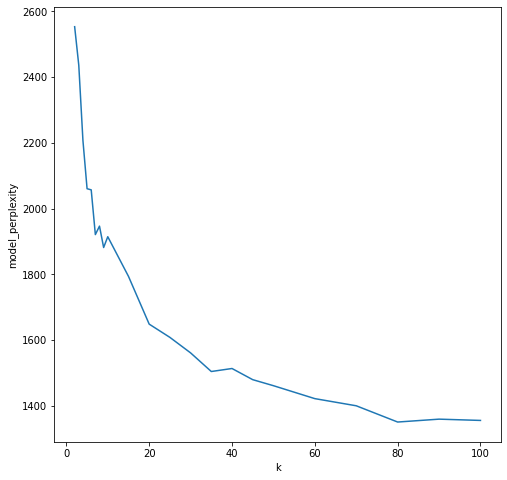

In [ ]:
#Perplexity 값 시각화
fig, ((ax1))= plt.subplots(nrows=1, ncols=1)   #(1,1)짜리 subplot
fig.set_size_inches(8,8)  #사이즈 지정
sns.lineplot(x="k", y="model_perplexity", data=perplexity_df, ax=ax1) #k값과 perplexity를 x, y로 하는 선 그래프

**4. 최적의 k값으로 최종 토픽 모델링을 실시합니다.**

Perplexity값의 경사도가 줄어드는 지점을 주관적으로 판단하여 결정하였습니다.

다만 최적의 k값을 37개로 잡고 모델을 출력하였으나, 각 토픽 간의 차이가 두드러지지 않다고 판단하여,

토픽의 개수를 18개로  변경하여 출력하였습니다.

In [ ]:
  #최적화된 모델 출력
  k = 18
  mdl_k=lda(k, 1000, text=news_essential['nouns']) #모델링

문서 개수: 28009 , 단어 개수: 27411 , 단어의 총수: 835186
제거된 단어들: []
훈련 중...
반복: 0	로그-우도: -8.462526404306654
반복: 50	로그-우도: -7.9209474241482365
반복: 100	로그-우도: -7.760277556065406
반복: 150	로그-우도: -7.690768453701314
반복: 200	로그-우도: -7.6462305738817555
반복: 250	로그-우도: -7.618752105025527
반복: 300	로그-우도: -7.599387899249389
반복: 350	로그-우도: -7.588670390140253
반복: 400	로그-우도: -7.57864371601339
반복: 450	로그-우도: -7.572644842440097
반복: 500	로그-우도: -7.558439483426747
반복: 550	로그-우도: -7.515943954517285
반복: 600	로그-우도: -7.498185998229303
반복: 650	로그-우도: -7.489990421820477
반복: 700	로그-우도: -7.483225103128933
반복: 750	로그-우도: -7.479434117321097
반복: 800	로그-우도: -7.473703642825279
반복: 850	로그-우도: -7.470762875530017
반복: 900	로그-우도: -7.466368099690698
반복: 950	로그-우도: -7.462540565865932
<Basic Info>
| LDAModel (current version: 0.12.2)
| 28009 docs, 835186 words
| Total Vocabs: 27411, Used Vocabs: 27411
| Entropy of words: 7.81031
| Entropy of term-weighted words: 7.81031
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 200, Burn-in 

## 토픽 이름 붙이기

```
학습된 모델의 결과를 사용하여 생성된 토픽의 이름을 붙이는 단계입니다. 
```

* 토픽의 개수가 총 18개로, 이 중 비중이 가장 높은 열 개의 토픽의 주제에 이름을 붙였습니다. 해당 부분은 내용이 다소 길어져 별도의 문서로 첨부합니다. 
> 주제 문서: https://docs.google.com/document/d/1ukzOP4rpesA8WsiPH7iZoxS2RwGHEIN15ugV6Shth_g/edit?usp=sharing





**1. 각 기사별로 가장 가능성 높은 확률의 토픽을 붙입니다.**

In [ ]:
#개별 주제에 속할 확률을 제시하는 데이터프레임을 생성
new_df = pd.DataFrame()
for i, line in enumerate(mdl_k.docs):
    temp=pd.DataFrame(line.get_topic_dist()).T
    new_df=new_df.append(temp)
new_df = new_df.reset_index()
new_df = new_df.drop(['index'], axis=1)
new_df.columns = ['#'+ str(x) for x in range(1,k+1)]

In [ ]:
new_df.head(2)

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18
0,0.000674,0.302706,0.001275,0.176789,0.001188,0.000783,0.026429,0.000589,0.227445,0.001443,0.001154,0.001263,0.001152,0.000852,0.001349,0.000870,0.101969,0.152071
1,0.001001,0.001461,0.001893,0.001164,0.001765,0.001164,0.001909,0.000875,0.151125,0.002144,0.151127,0.001876,0.225829,0.001266,0.002004,0.001292,0.450308,0.001797


In [ ]:
#idxmax 활용하여 가장 가능성 높은 확률의 토픽을 기존 데이터 끝에 붙임
theta_df = news_essential.merge(new_df, left_index=True, right_index=True)
theta_df['topic']=theta_df[['#'+ str(s) for s in range(1, k+1)]].idxmax(axis=1)

In [ ]:
#생성된 데이터프레임 확인
theta_df.head(10)

,id,date,maintext,date1,year-month,year,month,nouns,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18,topic
0,1.1002e+06,20211031,31일 오후 4시 서울 용산구 이태원 세계음식문화거리는 ‘핼러윈 데이’ 특수를 맞아...,2021-10-31,2021-10,2021,10,"[오후, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 핼러윈, 데이, 특수...",0.000674,0.302706,0.001275,0.176789,0.001188,0.000783,0.026429,0.000589,0.227445,0.001443,0.001154,0.001263,0.001152,0.000852,0.001349,0.000870,0.101969,0.152071,#2
0,01101001.20161230112819001,20161230,전북도청 공무원들의 음주운전이 잇따라 발생하고 있다. 전북 전주 완산경찰서는 지난 ...,2016-12-30,2016-12,2016,12,"[전북, 도청, 공무원, 발생, 전북, 전주, 완산, 경찰서, 전주시, 서서학동, ...",0.000674,0.302706,0.001275,0.176789,0.001188,0.000783,0.026429,0.000589,0.227445,0.001443,0.001154,0.001263,0.001152,0.000852,0.001349,0.000870,0.101969,0.152071,#2
1,1.1007e+06,20211031,핼러윈데이를 하루 앞둔 30일 서울 용산구 이태원의 세계음식문화거리에 많은 인파가 ...,2021-10-31,2021-10,2021,10,"[핼러윈데이, 하루, 서울, 용산구, 이태원, 세계, 음식, 문화, 거리, 인파, ...",0.001001,0.001461,0.001893,0.001164,0.001765,0.001164,0.001909,0.000875,0.151125,0.002144,0.151127,0.001876,0.225829,0.001266,0.002004,0.001292,0.450308,0.001797,#17
1,01100201.20161230041455001,20161230,올 한해도 팍팍한 삶에 지친 국민들은 스포츠가 만들어 낸 스토리에 많은 공감을 보냈...,2016-12-30,2016-12,2016,12,"[국민, 스포츠, 스토리, 공감, 영광, 순간, 선수, 국민, 박수, 선수, 패배,...",0.001001,0.001461,0.001893,0.001164,0.001765,0.001164,0.001909,0.000875,0.151125,0.002144,0.151127,0.001876,0.225829,0.001266,0.002004,0.001292,0.450308,0.001797,#17
2,1.1004e+06,20211031,핼러윈을 하루 앞둔 지난달 30일 오후 서울 용산구 이태원역 사거리와 해밀턴호텔 주...,2021-10-31,2021-10,2021,10,"[핼러윈, 하루, 지난달, 오후, 서울, 용산구, 이태원역, 사거리, 해밀턴, 호텔...",0.000818,0.306336,0.245660,0.245065,0.001442,0.000951,0.001560,0.000714,0.001399,0.001751,0.001401,0.001533,0.031912,0.001034,0.001637,0.001056,0.154263,0.001468,#2
2,01100401.20161229125726007,20161229,가입자가 약 2000만 명인 자동차보험의 표준약관이 내년 3월부터 달라진다. 특히 ...,2016-12-29,2016-12,2016,12,"[가입자, 자동차, 보험, 표준, 약관, 내년, 보험사, 피해자, 분쟁, 사망, 보...",0.000818,0.306336,0.245660,0.245065,0.001442,0.000951,0.001560,0.000714,0.001399,0.001751,0.001401,0.001533,0.031912,0.001034,0.001637,0.001056,0.154263,0.001468,#2
3,1.1005e+06,20211031,"경찰, 구속영장 신청 검토\n\n\n\n핼러윈데이(30일) 전날 음주운전 신고를 받...",2021-10-31,2021-10,2021,10,"[경찰, 구속, 영장, 신청, 검토, 핼러윈데이, 전날, 신고, 출동, 경찰관, 승...",0.000844,0.001231,0.001595,0.000981,0.001488,0.000981,0.001609,0.000737,0.001443,0.001806,0.819785,0.001581,0.001442,0.001067,0.001689,0.158462,0.001746,0.001514,#11
3,01101101.20161229172120002,20161229,"경기남부청, 경찰관 500명 동원수시로 장소 바꾸는 ‘스팟단속’올해 마지막 금요일 ...",2016-12-29,2016-12,2016,12,"[경기, 남부, 경찰관, 동원, 수시, 장소, 스팟단, 올해, 마지막, 금요일, 경...",0.000844,0.001231,0.001595,0.000981,0.001488,0.000981,0.001609,0.000737,0.001443,0.001806,0.819785,0.001581,0.001442,0.001067,0.001689,0.158462,0.001746,0.001514,#11
4,1.1011e+06,20211031,경찰이 ‘위드 코로나’(단계적 일상회복) 시행에 따라 술자리가 잦아질 것에 대비해 ...,2021-10-31,2021-10,2021,10,"[경찰, 위드 코로나, 단계, 일상, 회복, 시행, 술자리, 대비, 강도, 단속, ...",0.032318,0.913995,0.001595,0.000981,0.001488,0.000981,0.001609,0.000737,0.001443,0.001806,0.001445,0.001581,0.001442,0.001067,0.001689,0.032563,0.001746,0.001514,#2
4,01100611.20161229153639001,20161229,"대한보건협회가 과음 및 폭음이 증가해 각종 음주사고가 발생하기 쉬운 연말연시 기간,...",2016-12-29,2016-12,2016,12,"[대한보건협회, 과음, 폭음, 증가, 각종, 사고, 발생, 연말연시, 기간, 음주폐...",0.032318,0.913995,0.001595,0.000981,0.001488,0.000981,0.001609,0.000737,0.001443,0.001806,0.001445,0.001581,0.001442,0.001067,0.001689,0.032563,0.001746,0.001514,#2


**2. 가장 개수가 많은 10개의 토픽을 확인하였습니다.**

In [ ]:
#토픽 개수 확인
theta_df['topic'].value_counts()

#12    3587
#5     3189
#11    2128
#16    2081
#10    1973
#1     1645
#17    1530
#7     1521
#18    1323
#15    1300
#3     1248
#13    1238
#6     1130
#14    1052
#2      959
#4      837
#9      673
#8      595
Name: topic, dtype: int64

```
  확인 결과 비율이 가장 많은 10개의 토픽은
  #12, #5, #11, #16, #10, #1, #17, #7, #18, #15 이었음.
```


In [ ]:
#토픽별로 최빈 단어 파악하기 위한 데이터프레임
topic_df = pd.DataFrame()
for i in range(0, k):
  temp = pd.DataFrame()
  temp = pd.DataFrame(mdl_k.get_topic_words(i, top_n=10))
  temp.columns = ["#"+str(i+1),"probs"+str(i+1)]
  temp = temp.reset_index()
  if (i==0):
      topic_df = topic_df.append(temp, ignore_index=True)
  else:
      topic_df = topic_df.merge(temp, left_on="index", right_on="index")

In [ ]:
topic_df

,index,#1,probs1,#2,probs2,#3,probs3,#4,probs4,#5,probs5,#6,probs6,#7,probs7,#8,probs8,#9,probs9,#10,probs10,#11,probs11,#12,probs12,#13,probs13,#14,probs14,#15,probs15,#16,probs16,#17,probs17,#18,probs18,#19,probs19,#20,probs20,#21,probs21,#22,probs22,#23,probs23,#24,probs24,#25,probs25,#26,probs26,#27,probs27,#28,probs28,#29,probs29,#30,probs30,#31,probs31,#32,probs32,#33,probs33,#34,probs34,#35,probs35,#36,probs36,#37,probs37
0,0,측정,0.087269,미국,0.048887,법원,0.063249,택시,0.063884,혐의,0.060806,단속,0.096266,처벌,0.069964,광주,0.046091,버스,0.023594,후보자,0.051362,여성,0.032985,부산,0.073031,경찰,0.051959,교통,0.037690,경찰,0.053111,면허,0.074685,수사,0.020242,청와대,0.054500,선수,0.043285,방송,0.036959,구속,0.056130,문화,0.014108,방송,0.036692,보험,0.036836,선고,0.074594,노홍철,0.098836,프로,0.030276,공무원,0.052447,사고,0.090736,강정호,0.056857,검찰,0.065023,사진,0.037962,후보,0.055918,국민,0.024032,의원,0.090117,사고,0.069549,노엘,0.082437
1,1,거부,0.072229,현지,0.029381,판결,0.045852,서울,0.060057,서울,0.057492,경찰,0.052180,강화,0.041816,경찰,0.043230,추석,0.018218,장관,0.042274,교수,0.022244,경찰,0.041934,조사,0.023321,도로,0.022067,혐의,0.038892,적발,0.071071,인사,0.014311,대통령,0.053434,프로,0.025433,라디오,0.025388,혐의,0.038702,캠페인,0.013012,노홍철,0.035893,자동차,0.029972,혐의,0.051662,적발,0.045189,경기,0.024499,징계,0.049510,교통,0.052216,피츠버그,0.030817,혐의,0.050951,공개,0.030159,선거,0.029003,국민청원,0.023738,국회,0.028328,차량,0.057901,아들,0.045111
2,2,혐의,0.028452,시간,0.021394,취소,0.022926,사고,0.059241,경찰,0.046189,경찰청,0.035579,윤창호법,0.034418,혐의,0.042403,사고,0.016874,인사,0.039421,대학,0.021274,차량,0.038730,의혹,0.022528,운전자,0.021833,경찰서,0.030637,알코올,0.054132,사건,0.012758,비서관,0.024839,야구,0.025213,스타,0.025048,사고,0.035406,사회,0.011257,프로그램,0.020545,사고,0.017251,형사,0.037095,장윤주,0.028993,야구,0.023693,적발,0.015794,교통사고,0.049388,사면,0.022629,기소,0.047409,노홍철,0.023906,지사,0.026060,사고,0.020247,대표,0.017578,승용차,0.034233,장제원,0.039692
3,3,무면허,0.027590,보도,0.017232,법관,0.021588,차량,0.028218,도로,0.044571,지방,0.015775,범죄,0.024889,폭행,0.029498,운전자,0.015680,청문회,0.021866,추행,0.016424,신고,0.024171,최종훈,0.021316,기준,0.019958,경찰관,0.029131,농도,0.052287,육군,0.012663,문재인,0.024447,김원중,0.015710,작가,0.024163,뺑소니,0.033409,예방,0.009576,출연,0.019865,보험료,0.014597,징역,0.036862,경찰,0.028126,시즌,0.019886,위원회,0.014689,지난해,0.037284,특별사면,0.015068,검사,0.045225,영상,0.022467,대선,0.023010,사람,0.016536,민주,0.014624,운전자,0.033520,의원,0.036105
4,4,도로,0.027111,체포,0.015102,소송,0.021239,기사,0.026228,입건,0.042079,음주단속,0.015534,사고,0.021692,강인,0.027019,고속도로,0.015580,청와대,0.015632,친구,0.016216,운전자,0.018187,서울,0.019823,강화,0.019802,도로,0.028318,취소,0.045248,검찰,0.012004,수석,0.022709,구단,0.015655,출연,0.020148,영장,0.032510,시민,0.008955,하차,0.017987,금융,0.013911,기소,0.035588,측정,0.024583,한국,0.017826,비위,0.013638,발생,0.034545,정부,0.013987,서울,0.037364,모습,0.019147,대표,0.020548,사건,0.016095,평화,0.014479,도로,0.024513,사고,0.032288
5,5,적발,0.025578,경찰,0.013698,상대,0.017689,승용차,0.022809,경찰서,0.036273,서울,0.015120,개정안,0.020752,경찰서,0.021425,기사,0.015232,국회,0.015353,여자,0.015453,오후,0.017292,수사,0.017165,안전,0.018396,소속,0.023558,경찰,0.043667,평가,0.009462,민정,0.013569,징계,0.015436,김상혁,0.018922,배우,0.020425,서울,0.008004,무한도전,0.017747,운전자,0.012355,판사,0.030279,서울,0.019883,추신수,0.016437,직원,0.012640,사망자,0.029156,미국,0.013476,지검,0.028436,소셜 네트워크 서비스,0.016989,이재명,0.019211,청와대,0.011575,회의,0.012687,경찰,0.020656,래퍼,0.031372
6,6,서울,0.024333,영국,0.012053,처분,0.016758,경찰서,0.021329,인천,0.034937,코로나,0.014156,시행,0.020626,조사,0.020662,차량,0.014933,대통령,0.013461,성폭행,0.015315,상태,0.016208,사건,0.017165,시행,0.016756,경위,0.022202,정지,0.036816,국방부,0.009321,기강,0.013401,대표,0.015106,영화,0.016200,차량,0.017229,대상,0.007895,복귀,0.017187,제도,0.011669,단독,0.027646,보도,0.018148,리그,0.015944,행정,0.011616,기간,0.019305,법무부,0.012509,구속,0.023244,근황,0.014443,민주당,0.018783,가해자,0.010289,더불어민주당,0.012494,오전,0.019230,경찰,0.019770
7,7,경찰,0.023662,언론,0.009633,주심,0.016642,오전,0.021176,구속,0.032548,특별,0.014053,국회,0.016112,경찰관,0.019962,대리운전,0.012096,검증,0.013337,학교,0.014414,오전,0.013664,혐의,0.016791,자전거,0.016677,교통,0.022082,혈중알코올농도,0.034331,청렴,0.009180,정부,0.012953,김연아,0.014557,연예,0.015860,크림,0.015930,건강,0.007749,소속사,0.014869,손해,0.011394,지법,0.026521,매체,0.017425,선수,0.015452,소속,0.01137

**3. 상위10개 주제의 최빈 단어와 샘플 기사를 추출하여 명명합니다.**

명명 결과는 상단에 첨부된 문서 링크를 참고 바랍니다.

In [ ]:
#상위 10개 각각 확인해서 이름 붙이기
i = 15
cnt = len(theta_df[theta_df['topic']=='#'+str(i)])
print("토픽 {:8}: 토픽 개수 {:8}, 전체 퍼센트 {:8.3f}%".format(i, cnt, cnt/len(news_essential)*100)) # 해당 토픽의 정보 

print(topic_df['#'+str(i)]) # 해당 토픽에서 가장 많이 나오는 단어 

theta_df[theta_df['topic']=='#'+str(i)]['maintext'].sample(n=15).values # 임의로 선택 15개의 문서 

토픽       15: 토픽 개수     1300, 전체 퍼센트    4.641%
0     직원
1    청와대
2    비서관
3     수사
4     사건
5     관련
6     기관
7     기강
8     인사
9     조사
Name: #15, dtype: object


array(['앞으로 공금을 횡령하거나 유용한 지방자치단체 공무원은 파면 또는 해임토록 하는 등 공직비리에 대한 징계가 강화된다. 행정안전부는 10일 이같은 내용의 ‘지방공무원 징계양정에 관한 규칙 개정안’을 지자체에 내려보냈다고 밝혔다.\n개정 규칙에 따르면 지방공무원이 고의로 공금을 횡령하거나 유용하면 파면 또는 해임된다. 과실인 경우라도 해임, 강등 등 다른 사유..',
       '참여정부 출범 이후 음주운전, 도박, 성희롱 등으로 징계받은 대통령경호실 직원이 13명에 달하고, 매년 증가추세를 보이는 것으로 나타나 경호실의 기강해이가 심각하다는 지적이 제기됐다.\n국회 운영위 소속 민주당 이낙연(전남 함평 영광) 의원과 한나라당 김기현(울산 남을)의원 등이 28일 대통령경호실로부터 제출받아 분석 발표한 자료에 따르면 올해 9월 현재..',
       '#질문 1. 오토바이 운전자가 번호판을 청테이프로 가리고 주행하면 처벌이 가능한가.#질문 2. 오토바이 운전자 뒤에 탄 동승자가 ‘폭주를 주도한 리더’일 경우 처벌이 가능할까.대답은 모두 ‘아니요’다. 현행 법률에는 처벌 규정이 없기 때문이다. 폭주족들이 ‘법의 사각지대’에서 마음껏 달리고 있는 이유다.번호판을 가린 오토바이는 ‘날치기’ 같은 절도나 성..',
       '음주운전 처벌을 강화하는 이른바 ‘윤창호법’이 시행된 첫날 인천에서 음주운전을 하다가 횡단보도를 건너던 여성을 치어 숨지게 한 50대 남성이 경찰에 붙잡혔다. \n \n 인천 중부경찰서는 특정범죄가중처벌법상 위험운전치사 혐의로 A 씨(59)에 대해 사전 구속영장을 신청했다고 19일 밝혔다. 경찰에 따르면 A 씨는 윤창호법 시행 첫날인 18일 오후 7시 50..',
       '음주운전 두번 걸리면 최대 징역 5년\n\n\n더불어민주당과 자유한국당이 7일 정기국회 마지막 본회의를 열어 일명 ‘윤창호법’ 등 비(非)쟁점 법안들을 일괄 처리했다. 바른미래당ㆍ민주평화당ㆍ정의당 등 야 3당이 내년 예산안과 선거제 개혁 연계처리 불발에 반발

## 토픽 시각화


연도별로 음주운전에 대한 언급이 어떻게 변화했는지 알아보기 위해, 각 토픽의 구성 비율의 변화를 시각화하여 나타냈습니다.

In [ ]:
#보기 편하도록 필요한 컬럼만 남김
result=theta_df[['id','maintext','year-month','year','month','topic']]

In [ ]:
result.head(3) #데이터 확인

,id,maintext,year-month,year,month,topic
0,1.1002e+06,31일 오후 4시 서울 용산구 이태원 세계음식문화거리는 ‘핼러윈 데이’ 특수를 맞아...,2021-10,2021,10,#2
0,01101001.20161230112819001,전북도청 공무원들의 음주운전이 잇따라 발생하고 있다. 전북 전주 완산경찰서는 지난 ...,2016-12,2016,12,#2
1,1.1007e+06,핼러윈데이를 하루 앞둔 30일 서울 용산구 이태원의 세계음식문화거리에 많은 인파가 ...,2021-10,2021,10,#17


**1. 연도별 각 토픽의 구성 비율 정보를 담은 데이터프레임을 생성합니다.**

분석 첫 해인 2001년 각 토픽의 구성 비율을 계산하고, 다른 해의 경우에도 동일하게 반복하여 하나의 데이터프레임에 합칩니다.

In [ ]:
#첫 해(2001년) 토픽별 구성비율
by_year=result[result['year']==2001].groupby('topic')['id'].agg(['count']) #해당 연도의 뉴스기사 토픽별 카운트
by_year['percentage']=by_year['count']/by_year['count'].sum()*100 #백분율로 변환
by_year=by_year['percentage'].reset_index() #인덱스 리셋
by_year.columns=['topic','2001'] #컬럼명 재지정

In [ ]:
#2002~2021년의 토픽도 동일한 방법으로 반복하고, 2001년 계산 결과에 조인
yearindex=2002
for i in range (19):
  res_temp=result[result['year']==yearindex].groupby('topic')['id'].agg(['count'])
  res_temp['percentage']=res_temp['count']/res_temp['count'].sum()*100
  res_temp=res_temp['percentage'].reset_index()
  res_temp.columns=['topic',str(yearindex)]
  by_year=pd.merge(by_year,res_temp,how='left',on='topic') #데이터 병합
  yearindex+=1 #다음 해로 넘어감
by_year=by_year.set_index('topic') #인덱스명 지정

In [ ]:
#문자 순으로 나열된 컬럼을 숫자 순으로 재정렬
by_year=by_year.reindex(['#'+ str(x) for x in range(1,k+1)])

#NA를 0으로 교체
by_year=by_year.fillna(0)

#행-열 전환
by_year=by_year.transpose()

In [ ]:
by_year.hea #데이터 확인

topic,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18
2001,17.752809,6.067416,3.370787,2.022472,4.044944,2.696629,0.224719,1.348315,3.146067,4.269663,10.337079,9.438202,11.011236,1.797753,3.820225,1.123596,11.011236,6.516854
2002,7.960199,3.482587,4.975124,4.228856,11.940299,3.980100,2.238806,2.736318,3.233831,4.477612,9.203980,18.905473,7.462687,2.238806,0.995025,2.238806,6.218905,3.482587
2003,2.371542,0.790514,1.976285,1.581028,63.833992,5.335968,1.976285,1.778656,0.988142,2.371542,2.569170,4.150198,0.988142,0.592885,3.359684,0.197628,4.347826,0.790514
2004,6.990291,1.165049,4.271845,2.524272,11.067961,3.495146,1.553398,2.524272,3.689320,6.990291,6.019417,13.980583,5.825243,7.572816,5.631068,1.165049,11.067961,4.466019
2005,1.981982,2.342342,5.045045,4.324324,12.252252,3.423423,6.126126,1.981982,3.963964,6.126126,8.468468,12.432432,8.648649,4.144144,8.108108,0.900901,4.684685,5.045045
2006,7.676768,2.222222,5.656566,4.848485,21.414141,1.212121,4.242424,4.040404,2.424242,7.272727,5.050505,3.636364,7.070707,1.010101,5.454545,6.464646,6.868687,3.434343
2007,7.815631,0.601202,21.042084,4.609218,5.010020,1.202405,11.022044,5.410822,2.004008,12.024048,3.807615,3.607214,4.809619,5.210421,1.402806,3.406814,5.210421,1.803607


**2. 상위 10개 토픽의 구성 비율 변화를 파악합니다.**

모든 토픽을 하나의 차트에 나타낼 경우 시인성이 떨어질 것으로 판단하여 각 토픽마다 subplot에 비율 변화를 나타냈습니다.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f1f81a50>,
      dtype=object)

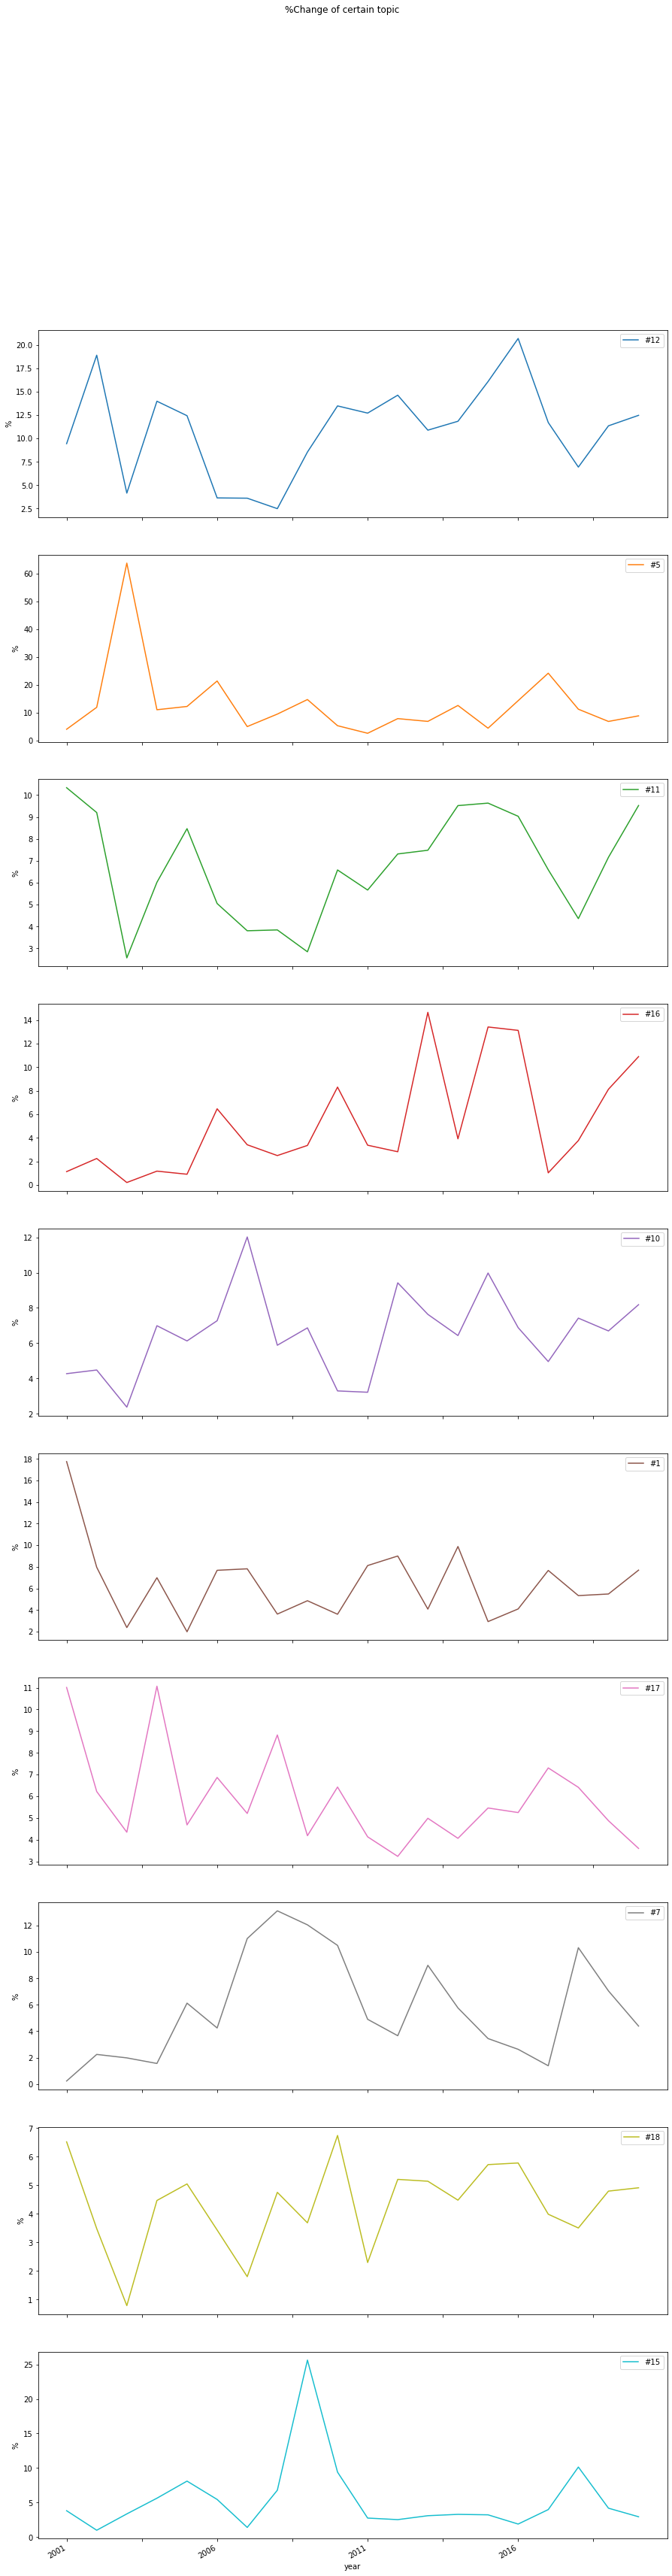

In [ ]:
#상위 10개 토픽만 선정하여 시각화
by_year[['#12','#5','#11','#16','#10','#1','#17','#7','#18','#15']].plot(xlabel='year',ylabel='%',kind='line',title='%Change of certain topic',figsize=(15,60),subplots=True)

```
시각화 결과는 크게 다음과 같습니다:
- 음주운전 운전자의 행위가 집중적으로 묘사된 #16의 구성 비율이 최근 증가하고 있음
- 경찰의 음주운전 단속을 다루는 #10의 비중도 증가세
- 반면 음주운전 통계를 다루는 #17은 비율 감소
예상과 달리 음주운전 처벌을 다루는 #12, #7은 상승세가 보이지 않았음.
```

# 추가 분석



# **A. 음주운전 적발 현황과 토픽 비율 변화 간 관계 파악**

 2007년부터 2019년까지 (이전/이후 데이터 미제공) 경찰청에서 제공하는 음주운전 적발 현황을 가져와 각 토픽의 구성 비율 변화와의 연관성을, 다중선형회귀를 통해 파악하였습니다.

**1. 데이터 준비 및 탐색적 분석**

In [ ]:
#연도별로 구분된 데이터를 가져와 하나로 병합. 첫 행이 컬럼명이고, 인코딩은 CP949로 지정
rec07=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전 적발기록_2007.csv',header=0,sep=',',encoding='CP949')
rec08=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2008.csv',header=0,sep=',',encoding='CP949')
rec09=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2009.csv',header=0,sep=',',encoding='CP949')
rec10=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2010.csv',header=0,sep=',',encoding='CP949')
rec11=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2011.csv',header=0,sep=',',encoding='CP949')
rec12=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2012.csv',header=0,sep=',',encoding='CP949')
rec13=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2013.csv',header=0,sep=',',encoding='CP949')
rec14=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2014.csv',header=0,sep=',',encoding='CP949')
rec15=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2015.csv',header=0,sep=',',encoding='CP949')
rec16=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2016.csv',header=0,sep=',',encoding='CP949')
rec17=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2017.csv',header=0,sep=',',encoding='CP949')
rec18=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2018.csv',header=0,sep=',',encoding='CP949')
rec19=pd.read_csv('/content/drive/MyDrive/PCDA/실습1/경찰청 음주운전 적발기록 현황/경찰청_음주운전적발기록_2019.csv',header=0,sep=',',encoding='CP949')

In [ ]:
#2009년 자료의 경우 컬럼명이 다르게 설정되어 있어 변경해줌
rec09.columns=['적발횟수','알콜농도','측정거부여부','측정일시']

In [ ]:
#인덱스 중첩 허용하지 않고 데이터 병합
records=pd.concat([rec07,rec08,rec09,rec10,rec11,rec12,rec13,rec14,rec15,rec16,rec17,rec18,rec19],ignore_index=True)

In [ ]:
records.shape #크기 확인

(3432191, 4)

In [ ]:
records.dtypes #자료형 확인

적발횟수        int64
알콜농도      float64
측정거부여부     object
측정일시       object
dtype: object

In [ ]:
records['적발횟수'].agg(['min','max','mean']) #적발횟수 최소/최대/평균

min      1.000000
max     11.000000
mean     1.026942
Name: 적발횟수, dtype: float64

In [ ]:
records['알콜농도'].agg(['min','max','median','mean']) #혈중알콜농도 최대/최소/중간값/최속

min       0.000000
max       9.142000
median    0.099000
mean      0.109249
Name: 알콜농도, dtype: float64

**2. 데이터 전처리**

* 불필요한 컬럼을 제거하였습니다.

* 혈중알콜농도가 약 0.4~0.5%가 되면 의식을 잃거나 생명에 지장이 생기는 것으로 알려져 있습니다. 따라서 0.5%이상의 알콜농도는 모두 이상치로 판단하고 제거하였습니다.

* 현장 측정을 거부한 운전자는 알콜농도가 0으로 표기되고, 거부여부 Y가 표기됩니다. 해당 데이터 또한 제거하였습니다.

* 회귀분석을 진행하기에 알콜농도 수치가 너무 작았습니다. 따라서 농도 단위를 %에서 ‰로 변환하였습니다.

* 뉴스 기사와 마찬가지로 측정일시를 datetime형으로 변환하였습니다.

In [ ]:
#BAC 0.5%이상의 outlier 확인
records[records['알콜농도']>=0.5]

,적발횟수,알콜농도,측정거부여부,측정일시
44968,1,0.920,N,2007-02-15 11:45
60756,1,0.708,N,2007-03-07 05:15
94389,1,0.500,N,2007-04-09 01:12
110779,1,0.890,N,2007-04-23 16:00
115247,1,0.575,N,2007-04-27 10:00
...,...,...,...,...
3407447,1,0.740,N,2019-10-28 00:47
3410250,2,0.550,N,2019-11-04 07:52
3415543,1,1.000,N,2019-11-17 18:45
3420788,1,0.860,N,2019-12-01 10:41


In [ ]:
#측정거부 기록 확인
records[records['측정거부여부']=='Y']

,적발횟수,알콜농도,측정거부여부,측정일시
9,1,0.0,Y,2007-01-01 00:10
89,1,0.0,Y,2007-01-01 01:40
97,1,0.0,Y,2007-01-01 01:50
197,1,0.0,Y,2007-01-01 05:25
253,1,0.0,Y,2007-01-01 13:25
...,...,...,...,...
3432090,1,0.0,Y,2019-12-31 07:40
3432105,1,0.0,Y,2019-12-31 13:45
3432135,1,0.0,Y,2019-12-31 19:10
3432156,1,0.0,Y,2019-12-31 21:28


In [ ]:
#불필요한 컬럼 제거
records=records[['알콜농도','측정거부여부','측정일시']]

#측정을 기록이 존재하고, 알콜농도 0.5 미만인 자료만 남김
records=records[(records['측정거부여부']=='N')&(records['알콜농도']<0.5)]

#알콜농도 단위를 천분율로 변환
records['알콜농도']=records['알콜농도']*10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
records.shape #데이터 확인

(3372441, 3)

시간을 datetime으로 변환

In [ ]:
#날짜를 문자형으로 변환
records['date1'] = records['측정일시'].astype("str")

#datetime에서 제공하는 시간형 자료형으로 변환. 일부 날짜가 정상적으로 인지되지 않아 슬라이서를 지정해줌
records['date1'] = records['date1'].apply(lambda x: dt.datetime.strptime(x.strip(' \t\r\n'),'%Y-%m-%d %H:%M'))

#연-월 형식의 컬럼 추가 지정
records['year-month'] = records['date1'].dt.strftime('%Y-%m')

**3. 월별 적발자 알콜농도의 카운트와 평균을 시각화합니다.**

In [ ]:
#적발자의 월평균 수와 평균 농도
records_ym=records.groupby('year-month')['알콜농도'].agg(['mean','count'])

[Text(0, 0.5, 'monthly cnt'), Text(0.5, 1.0, '#of crackdowns of DUI')]

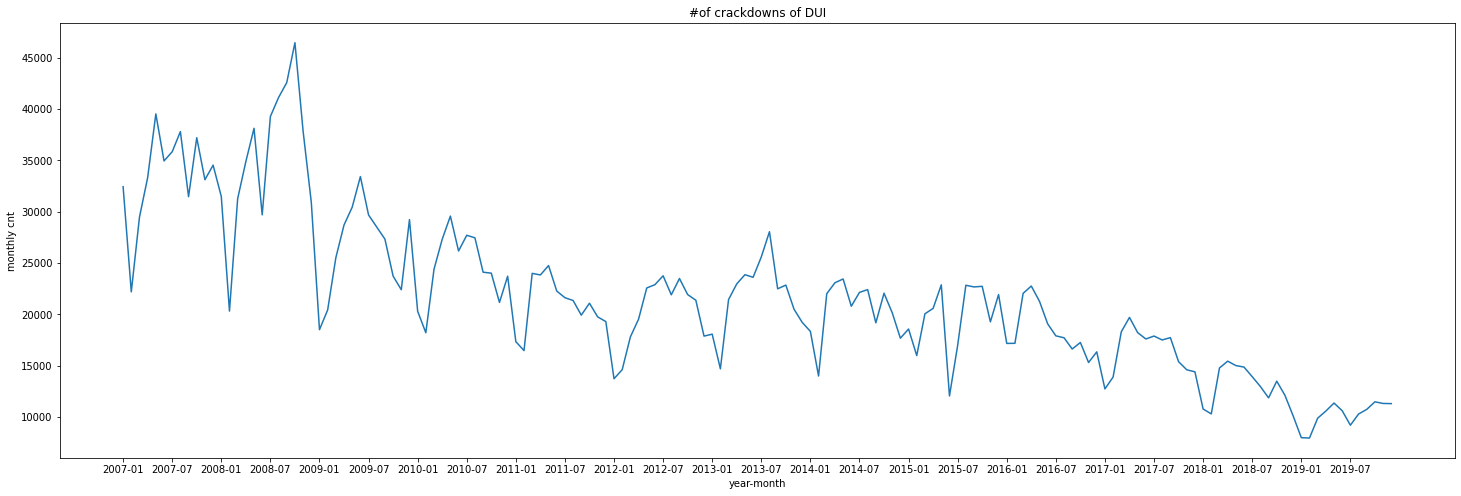

In [ ]:
#시각화 1: 음주운전 월간 적발자수 시각화
plt.figure(figsize=(25,8)) #이미지 사이즈 설정
ax=sns.lineplot(x=records_ym.index,y=records_ym['count']) #x,y지정하고 그림그리기
freq=6 #x축 값 출력 빈도
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq]) #x축 빈도 설정
ax.set(title='#of crackdowns of DUI',ylabel='monthly cnt') #라벨, 타이틀 지정

```
음주운전 적발자는 나날이 감소하고 있음을 볼 수 있습니다. 또한 주기적으로 여름 적발자 수가 겨울 적발자 수보다 많이 나타나고 있습니다.
```

[Text(0, 0.5, '‰'), Text(0.5, 1.0, 'avg. BAC of drivers caught in DUI')]

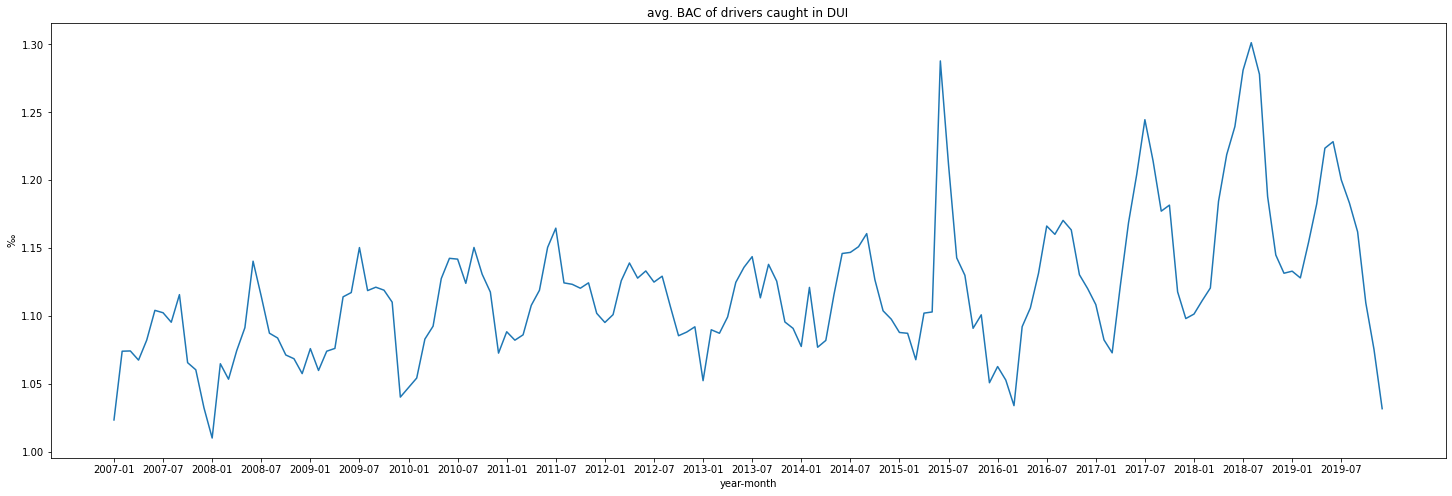

In [ ]:
#시각화 2: 음주운전 적발자의 월평균 혈중알콜농도 시각화
plt.figure(figsize=(25,8)) #이미지 사이즈 설정
ax=sns.lineplot(x=records_ym.index,y=records_ym['mean']) #x,y지정하고 그림그리기
freq=6 #x축 값 출력 빈도
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq]) #x축 빈도 설정
ax.set(title='avg. BAC of drivers caught in DUI',ylabel='‰') #라벨, 타이틀 지정

```
반면 음주운전 적발자의 혈중알콜농도는 조금씩 상승세를 보이고 있습니다.
이 또한 여름의 혈중알콜농도가 겨울보다 높게 나타나는 현상이 반복되고 있습니다.
```

**4. 앞서 토픽모델링을 마친 뉴스 기사를 다시 가져와 월별로 구성 비율을 파악합니다.**

In [ ]:
#월별 토픽별로 기사를 카운트합니다.
result_ym=result.groupby(['year-month','topic'])['id'].agg(['count'])

#카운트 결과를 피봇합니다.
result_ym.reset_index(inplace=True)
result_ym=pd.pivot_table(result_ym,values='count',index='year-month',columns='topic')

#해당 월에 존재하지 않는 토픽은 NA가 반환되므로 이를 0으로 대체하고, 컬럼 순서를 지정합니다.
result_ym=result_ym.fillna(0)
result_ym=result_ym[['#1','#2','#3','#4','#5','#6','#7','#8','#9','#10','#11','#12','#13','#14','#15','#16','#17','#18']]

#카운트 결과를 정수형으로 변환합니다.
result_ym=result_ym.astype('int32')

In [ ]:
result_ym.head()

topic,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18
year-month,,,,,,,,,,,,,,,,,,
2001-01,3,4,1,1,5,1,0,0,1,1,11,8,4,0,3,0,1,0
2001-02,6,1,2,0,0,0,0,2,1,0,0,0,1,2,0,0,11,0
2001-03,21,1,1,0,2,0,1,0,0,0,1,0,2,0,1,0,19,1
2001-04,4,1,1,0,1,0,0,0,4,2,1,2,5,2,1,1,0,0
2001-05,3,6,1,1,0,0,0,0,4,1,3,1,2,1,1,0,8,2


In [ ]:
# 도출된 월별 토픽별 카운트 값을, 각 토픽(i)마다, 행(j)마다의 반복문을 통해 구성 비율로 전환합니다.
for i in range (k): #i번째 토픽에 대하여
  result_ym_temp=[] #임시 리스트 생성
  for j in range(len(result_ym.index)):
    #매 월마다 토픽i기사수를 당월 기사수의 합으로 나눔
    result_ym_temp.append(result_ym.iloc[j][i]*100/result_ym.iloc[j].sum())
  result_ym['#'+str(i+1)]=result_ym_temp #이를 각 토픽별 컬럼에 지정하여 데이터 교체

In [ ]:
result_ym.head(8) #데이터 확인

topic,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18
year-month,,,,,,,,,,,,,,,,,,
2001-01,6.818182,8.365019,1.916326,1.883256,9.262212,1.716886,0.000000,0.000000,1.696011,1.676224,18.231808,11.840288,5.601754,0.000000,4.109141,0.000000,1.349216,0.000000
2001-02,23.076923,2.321429,4.504672,0.000000,0.000000,0.000000,0.000000,4.264117,2.033879,0.000000,0.000000,0.000000,1.991991,3.906783,0.000000,0.000000,20.715711,0.000000
2001-03,42.000000,1.408451,1.400394,0.000000,2.785172,0.000000,1.377524,0.000000,0.000000,0.000000,1.370397,0.000000,2.726953,0.000000,1.350094,0.000000,25.531119,1.235329
2001-04,16.000000,2.702703,2.583799,0.000000,2.482221,0.000000,0.000000,0.000000,9.576544,4.224287,2.017367,3.953591,9.516466,3.505268,1.707585,1.687199,0.000000,0.000000
2001-05,8.823529,15.066470,2.045408,2.002587,0.000000,0.000000,0.000000,0.000000,7.852685,1.825128,5.394150,1.723842,3.405194,1.662815,1.644688,0.000000,13.019457,3.009059
2001-06,12.121212,12.159175,2.071234,0.000000,2.026276,3.969995,0.000000,0.000000,3.820593,3.692184,0.000000,1.790168,19.417189,0.000000,1.536853,1.524277,1.512192,1.500570
2001-07,19.512195,5.712959,0.000000,0.000000,7.243076,1.710331,0.000000,0.000000,0.000000,3.379602,4.953915,1.599691,7.922453,0.000000,3.028733,2.982272,5.878443,8.580785
2001-08,10.256410,0.000000,2.209632,12.912656,1.873407,0.000000,0.000000,5.529739,1.761126,0.000000,12.164822,14.352283,1.469290,0.000000,1.459228,0.000000,1.449515,5.760526


**5. 음주운전 적발 결과와 월별 구성 비율을 조인하고 다중회귀분석을 실시합니다.**

In [ ]:
#데이터 조인
res_and_records=records_ym.merge(result_ym, left_index=True, right_index=True)

In [ ]:
res_and_records.head() #데이터 확인

,mean,count,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18
year-month,,,,,,,,,,,,,,,,,,,,
2007-01,1.023374,32429,0.000000,0.0,58.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.909091,2.623211,1.300971,1.295897,0.000000,0.000000,2.581894,0.000000,1.281322
2007-02,1.074386,22186,0.000000,0.0,83.783784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.568934,0.000000,1.106774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-03,1.074414,29466,10.606061,0.0,5.746626,4.204467,0.000000,2.756448,2.728007,17.557695,2.544552,5.054088,4.987659,6.158727,8.500889,0.000000,0.000000,1.192674,9.519515,4.675223
2007-04,1.067954,33317,23.529412,0.0,4.038005,5.817627,14.709927,3.273592,0.000000,0.000000,0.000000,6.413488,0.000000,0.000000,1.543637,1.530791,1.518453,0.000000,6.026372,0.000000
2007-05,1.082173,39520,29.166667,0.0,8.664260,1.967306,0.000000,3.861136,1.863607,0.000000,0.000000,7.336357,0.000000,1.728330,3.413688,0.000000,3.333258,0.000000,0.000000,0.000000




각 컬럼의 비중을 독립변수로, 음주운전 적발 건수와 혈중알콜농도 각각을 종속변수로 가정하였습니다.

5-1) 컬럼 비중을 독립변수로 설정할 경우 다중공선성이 의심되는 주제들은 없는지 파악하기 위해 상관관계 히트맵을 먼저 그려 보았습니다.

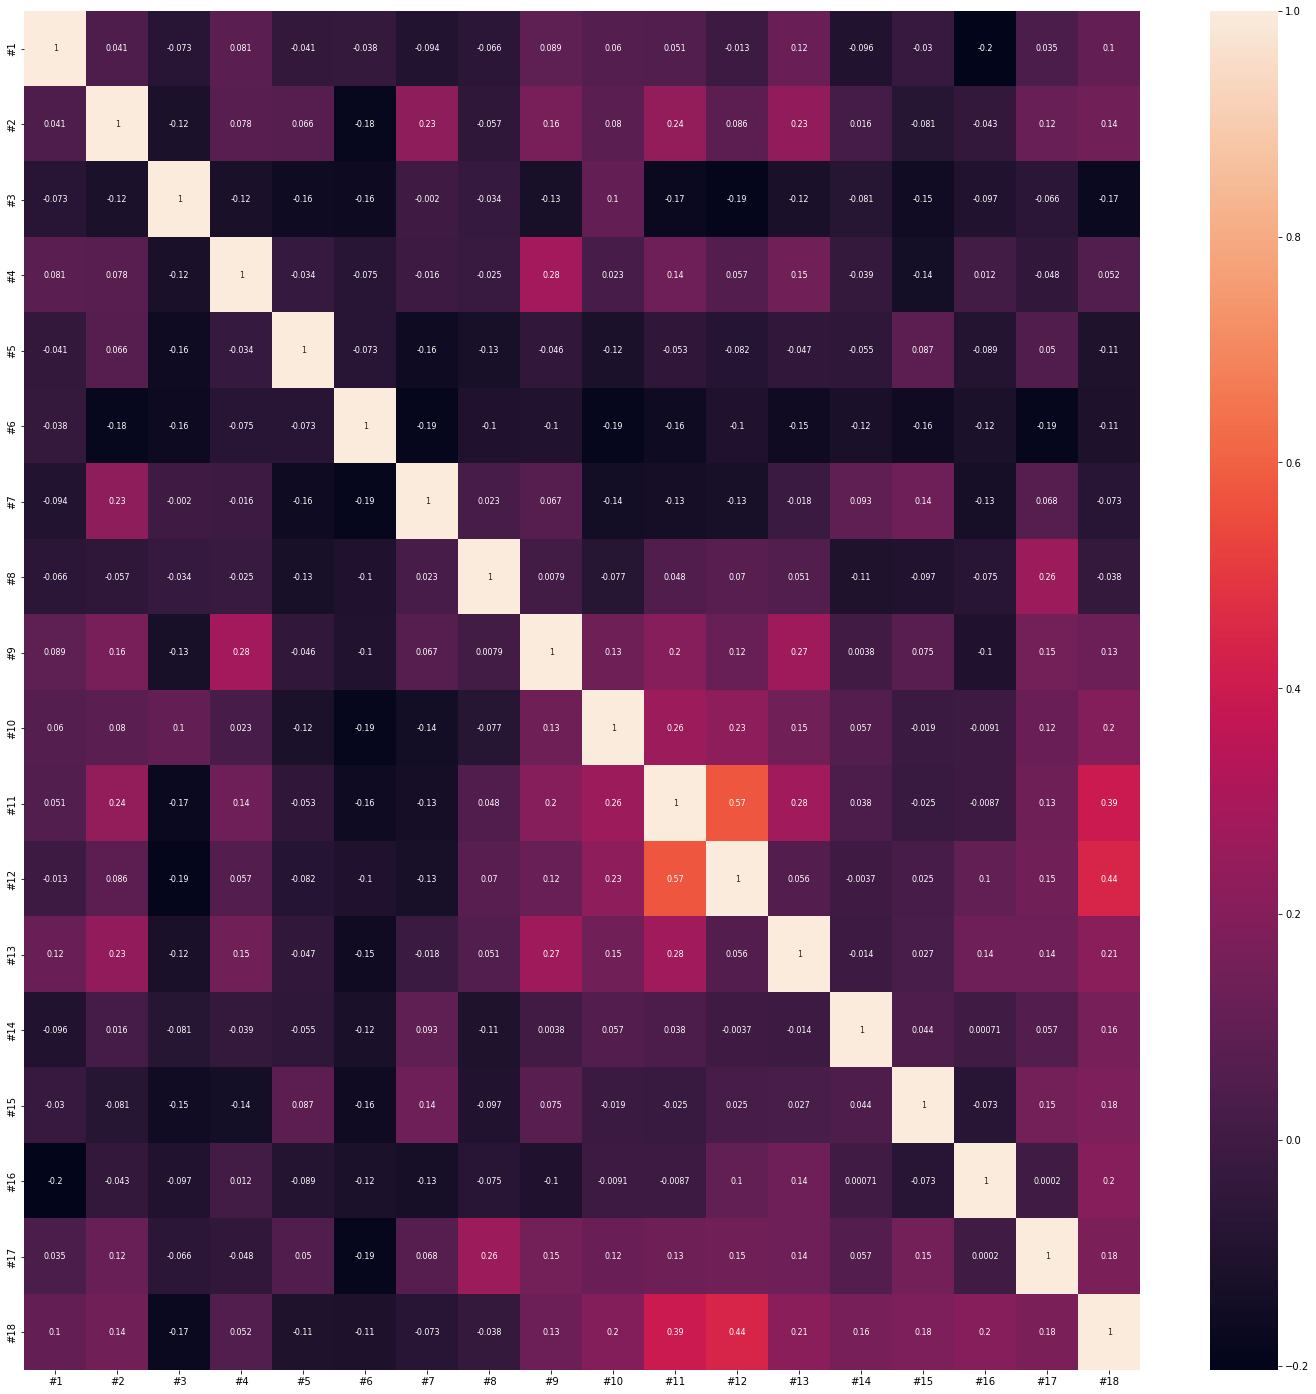

In [ ]:
#다중공선성 의심 컬럼 확인
corrs=X.corr()
plt.figure(figsize=(25,25)) #이미지 사이즈 설정
ax=sns.heatmap(corrs, annot=True,annot_kws={'size':8}) #히트맵 그리기

> 히트맵 확인 결과, #12(법적인 징계) 와 #11(적발 및 체포) 의 경우 0.57의 높은 상관계수를 보였습니다. 따라서 해당 주제에 대한 회귀분석 결과는 무의미합니다.
 이외에는 다중공산성이 의심되는 주제가 없어 회귀분석을 정상 진행하였습니다.


5-2) 다중회귀분석에는  **Statsmodel** 내에서 OLS(최소자승법)모델을 활용하였습니다.

In [ ]:
#X,y split. y1은 혈중알콜농도 평균값, y2는 단속자수입니다.
X=res_and_records.drop(['mean','count'],axis=1)
y1=res_and_records['mean']
y2=res_and_records['count']

In [ ]:
#5-2-1. '혈중알콜농도'를 종속변수로 하는 다중선형회귀

#train, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)

#Statsmodel
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     4.362
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.35e-06
Time:                        09:50:47   Log-Likelihood:                 209.21
No. Observations:                 109   AIC:                            -380.4
Df Residuals:                      90   BIC:                            -329.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9995      0.017     57.801      0.0

<다중회귀분석 결과 해석>

1. R-squared score 0.466으로 어느 정도의 설명력을 갖추었습니다.
2. 회귀계수는 #4에서 가장 크게, #2에서 가장 낮게 측정되었습니다.
3. P-value가 0.05 미만인 주제는 #1, #3, #4, #5, #6, #7, #8, #16입니다. 따라서 음주운전 적발자의 혈중알콜농도는 #4의 비중에 가장 크게 영향을 받는다고 할 수 있습니다.
4. DW검정값은 2.008로 잔차들의 독립성이 잘 확보되어 있습니다.

```
#4는 '택시','기사'가 주요 키워드입니다. 택시가 연관된 음주운전 사고를 다룬 주제로 보입니다.

* R-squared score: 데이터에 대한 모델의 설명력을 0~1로 나타냅니다. 0.4 이상일 때 해당 모델이 설명력을 갖춘 것으로 봅니다.
* P-value: 귀무가설을 기각하게 될 가능성을 의미합니다. 통상적으로 P-value가 0.05 미만일 경우 유의미한 것으로 봅니다.
* DW검정값: 잔차항의 독립성을 0~4로 나타냅니다. 2에 가까울수록 독립성이 높음을 뜻합니다.

```

In [ ]:
#5-2-2. '월평균 단속건수'를 종속변수로 하는 다중선형회귀

#train, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.3, random_state = 42)

#Statsmodel
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2.370
Date:                Wed, 24 Nov 2021   Prob (F-statistic):            0.00455
Time:                        07:08:39   Log-Likelihood:                -1034.7
No. Observations:                 100   AIC:                             2107.
Df Residuals:                      81   BIC:                             2157.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.759e+04   4132.307      6.676      0.0

<다중회귀분석 결과 해석>

1. R-squared sscore 0.345로, 혈중알콜농도보다는 다소 낮은 설명력을 갖추고 있습니다.
2. 회귀계수는 #17에서 가장 크게, #15에서 가장 낮게 측정되었습니다.
3. P-value가 0.05 미만인 주제는 존재하지 않습니다. 따라서 이 회귀계수는 유의미한 결과라고 할 수 없습니다.
4. DW검정값은 1.965로 잔차들의 독립성이 잘 확보되어 있습니다.

```
각 지표에 대한 설명은 이전 회귀분석에서의 설명으로 대체합니다.
```

#B. **음주운전 특가법 시행 전후 음주운전에 대한 언급 양상 변화 파악**

"특정범죄 가중처벌 등에 관한 법률 제 5조의11(위험운전 등 치사상) (일명 '제1윤창호법') 은 2018년 9월 고 윤창호 씨 사망 사건을 계기로 제정된, 음주운전으로 치사상사고를 유발하였을 때의 처벌을 강화하는 법률입니다.

2018년 9월 25일 발생한 해당 사고를 계기로 음주운전 처벌 강화에 대한 범사회적인 목소리가 있었고, 그 결과 이 제1윤창호법이 그해 11월 29일 국회 통과, 12월 18일 시행되었습니다.

해당 사건이 전국민적인 논의의 촉매제가 되었기 때문에, 사건의 발생 이전 시기와, 발생 후 법안 통과까지의 기간, 그리고 법안이 자리잡은 후의 시기 여론을 비교해 볼 필요가 있습니다. 

각 시기는 사고 발생 전 2개월(2018.07.25 ~ 2018.09.24), 사고 발생 후 법안 통과까지의 2개월(2018.09.29 ~ 2018.11.29) 그리고 법안 시행 후 1년 뒤 2개월 (2019.12.18 ~ 2020.01.17)로 설정하였고, 각 기간 동안 뉴스 기사에서 쓰인 텍스트는 어떠한 차이가 있는지 파악하고자 합니다.

조사 기간 내의 기사가 많지 않으므로 별도의 토픽모델링을 실시하지는 않고, 자주 쓰인 단어들의 차이가 있는지만 살펴보고자 합니다.

그로서 언론 보도의 역할이 입법에 어떤 영향을 끼쳤는지 파악하고자 합니다.


In [ ]:
#세 기간별로 명사만 추출한 데이터프레임 생성
dateindexed=news_essential.set_index('date1')
before=dateindexed.loc['2018-09-24':'2018-07-24']['nouns'].sum() #사고 전
during=dateindexed.loc['2018-11-29':'2018-09-28']['nouns'].sum() #사고 후~제정 전
after=dateindexed.loc['2020-01-18':'2019-12-17']['nouns'].sum() #법안 통과 1년 뒤

In [ ]:
#워드클라우드에 필요한 패키지 설치
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

In [ ]:
#카운터 생성
before=Counter(before)
during=Counter(during)
after=Counter(after)

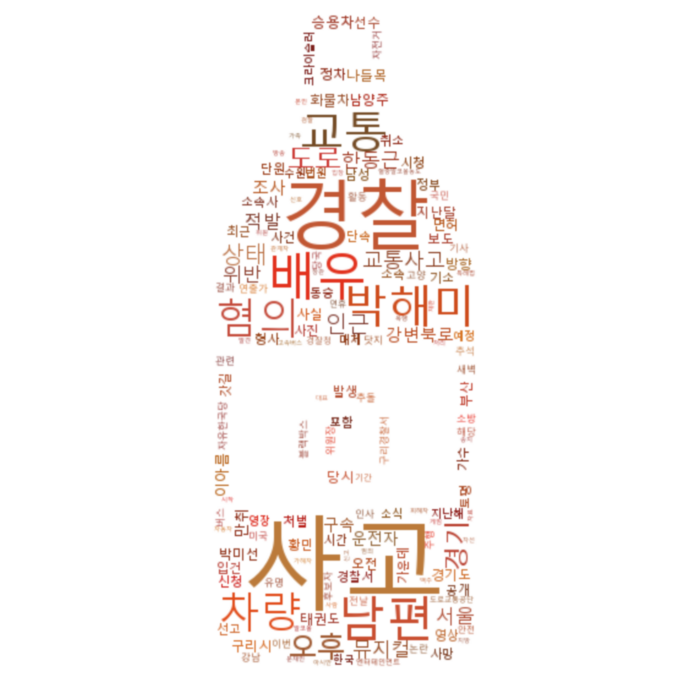

In [ ]:
#윤창호법 제정 이전 2개월

from matplotlib import font_manager, rc
import random

#색상 난수 함수 지정
def color_func(word, font_size,position,orientation,random_stat=None, **kwargs):
    return 'hsl({},{}%,{}%)'.format(random.randint(0,30),random.randint(50,80),random.randint(30,50))

#폰트 지정
font_path = "/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

#마스크 이미지 지정
maskimg=np.array(Image.open("/content/drive/MyDrive/PCDA/실습1/noun_Drink_4399837.png"))

#워드클라우드 생성
rc('font', family=font)
data = before.most_common(150)
wc = WordCloud(font_path='/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF',
                      background_color='white',mask=maskimg,relative_scaling=1).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(wc.recolor(color_func=blu_color_func, random_state=3),interpolation='bicubic')

주요 키워드는 '사고', '경찰','배우','박해미','차량','남편' 등이 있습니다.
이는 해당 기간 내 뮤지컬 연출가 황민 씨가 일으킨 음주운전 교통사고의 영향으로 보입니다. '크라이슬러','강변북로'등 사고 발생 상황을 집중적으로 다루고 있으며, '뮤지컬','엔터테인먼트' 등 가해자의 정보를 다루는 문서도 많습니다.

주목할 만한 점은 사고 가해자 '황민'씨보다 그의 배우자인 '박해미'씨에 대한 언급이 압도적으로 많다는 것입니다.

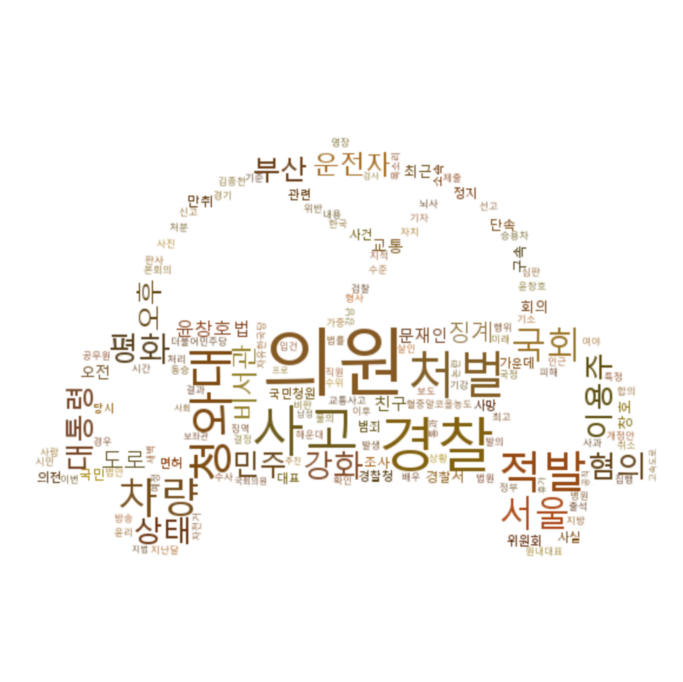

In [ ]:
#윤창호법 제정 과정 2개월

from matplotlib import font_manager, rc
import random

#색상 난수 함수 지정
def color_func(word, font_size,position,orientation,random_stat=None, **kwargs):
    return 'hsl({},{}%,{}%)'.format(random.randint(20,50),random.randint(50,80),random.randint(20,40))

#폰트 지정
font_path = "/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

#마스크 이미지 지정
maskimg=np.array(Image.open("/content/drive/MyDrive/PCDA/실습1/noun_crashed_1170256.png"))

#워드클라우드 생성
rc('font', family=font)
data = during.most_common(150)
wc = WordCloud(font_path='/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF',
                      background_color='white',mask=maskimg,relative_scaling=1).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(wc.recolor(color_func=blu_color_func, random_state=3),interpolation='bicubic')

직전 2개월과는 다르게 '청와대','의원','처벌','국회'와 같이 정치권의 영역과 관련된 용어가 눈에 띄게 많아진 반면, 이전과 다르게 고 윤창호 씨 교통사고 발생 상황을 다룬 용어는 잘 보이지 않습니다. 고 윤창호 씨 사망 사건이 법제화되는 과정에서 언론 기사들이 사고에 대한 언급이 줄고, 정치권에 지속적인 영향을 행사하였음을 알 수 있는 대목입니다.

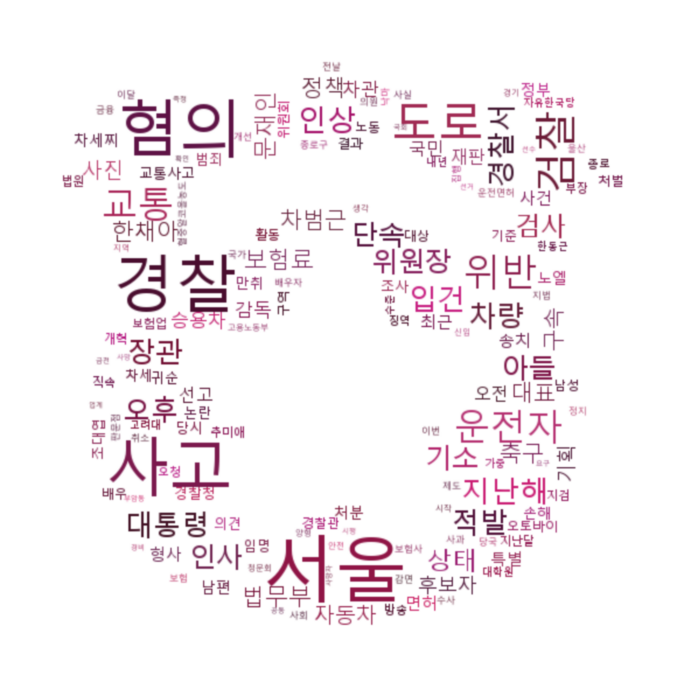

In [ ]:
#윤창호법 제정 1년 후 2개월

from matplotlib import font_manager, rc
import random

#색상 난수 함수 지정
def color_func(word, font_size,position,orientation,random_stat=None, **kwargs):
    return 'hsl({},{}%,{}%)'.format(random.randint(320,340),random.randint(50,80),random.randint(15,45))

#폰트 지정
font_path = "/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

#마스크 이미지 지정
maskimg=np.array(Image.open("/content/drive/MyDrive/PCDA/실습1/noun_Police_2233647.png"))

#워드클라우드 생성
rc('font', family=font)
data = after.most_common(150)
wc = WordCloud(font_path='/content/drive/MyDrive/PCDA/실습1/MALGUN.TTF',
                      background_color='white',mask=maskimg,relative_scaling=1).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(wc.recolor(color_func=blu_color_func, random_state=3),interpolation='bicubic')

사고 1년이 지난 시점에서는 다시 정치 용어들의 빈도가 줄어든 모습입니다. '차세찌','노엘' 등 여전히 음주운전 당사자에 대한 이야기가 많습니다. 다만 '정책','법원','법무부' 등 정책 시행 전과 비교하여 사고 후 처벌이나 대책과 관련된 용어들이 드러나기 시작하고 있어 차이가 존재한다고 할 수 있겠습니다.

## 분석 결과 논의

본 연구에서는 크게

1) 뉴스 기사를 활용한 토픽 모델링으로 국내 언론의 음주운전에 대한 묘사 특성과 그 변화 파악

2) 음주운전 적발 자료와 토픽 변화 간 상관관계 파악

3) '제1윤창호법'의 제정 시점 전후로 기사 텍스트에 발생한 변화

세 가지를 파악하고자 하였습니다.


---


1) 연구 설계 시에는 시간이 흐를수록 음주운전에 대한 처벌을 다루는 기사가 많아질 것이라고 생각하였습니다. 하지만 이와 관련된 주제의 비중은 뚜렷한 패턴을 보였다고 보기 어려웠습니다. 대신 음주운전 운전자의 행위 묘사와 음주운전 단속 자체를 다루는 기사의 비중이 증가하고, 음주운전 통계를 다루는 기사의 비중이 감소하고 있음을 확인하였습니다.

음주운전에 대한 인식이 급격히 변하지만 그 처벌에 대한 수위는 높아지지 않았고, 언론사들이 그에 따라 '약한 처벌'을 강조하기보다는 '운전자의 악질적 행동'을 중점적으로 묘사한 것이 아닌가 생각됩니다.

또한 해당 데이터를 시각화한 결과 2010년대 초중반을 기점으로 음주운전에 대한 언급 수가 크게 늘어났기 때문에, 해당 시기 주취범죄나 주취감경에 대하여 어떤 변화가 있었는지 더 파악할 필요가 있습니다.

---


 2) 기사 토픽이 음주운전자의 혈중알코올농도에는 부분적으로 영향을 주나, 단속 건수에는 유의미한 영향을 끼치지 못하고 있었습니다. 택시 관련 사고가 음주운전자의 혈중알코올농도와 가장 강한 관련이 있어 보였습니다.

여론 형성에 의해 음주운전이 줄어들 것으로 여전히 예상하고 있지만, 언론 보도변화가 어느 정도의 시기를 두고 음주운전 실태에 반영되는지, 또 그 외 다른 요인은 없는지 파악이 부족했기 때문에 유의미한 결과를 얻진 못한 것 같습니다. 또 단순 회귀분석만으로는 인과관계 파악이 어렵기 때문에, #4와 같이 관련성이 있어 보이는 주제에 대해서는 보다 심층적인 연구가 필요합니다. 뿐만 아니라 실제 두 변수 간 관련성이 선형으로 나타나는 경우가 흔치 않기 때문에 Ridge, Lasso 등의 규제된 선형회귀 혹은 다항회귀 분석 또한 검토할 필요가 있습니다.

한편 음주운전에 대한 기사는 연말이 가장 많았는 데 비해 정작 단속 건수는 여름이 많았습니다. 언론사가 여름철 음주의 위험성을 더욱 강조해야 할 것으로 사료됩니다. 또 시간이 갈수록 적발자의 혈중알코올농도가 증가하고 있어, 음주운전을 보다 근본적으로 차단할 방법이 논의되어야 할 시점이 아닌가 생각해봅니다.
 

---


3) 첫 번째 분석에서 볼 수 있듯 최근의 음주운전 기사는 발생한 교통사고의 상황 자체를 묘사하는 경향이 있습니다. 제1윤창호법 시행 이전에도 그러한 양상을 보였습니다. 하지만 고 윤창호 씨 교통사고가 전국적인 여론 형성의 촉매가 되면서, 언론 또한 사건에 대한 묘사보다는 그 이후 이것이 법 개정으로 이어질 수 있도록 하는 용어들을 많이 사용한 것으로 파악되었습니다. 한편 해당 특가법이 시행된 지 1년이 지나자 언론 보도 성향은 다시 사고를 묘사하고 있지만, 이전 대비 처벌 및 대책에 대한 용어들이 많이 나온 것으로 보아 윤창호법 개정 과정이 의식 변화에도 영향을 미쳤다고 결론을 내릴 수 있겠습니다.

한 가지 주목할 점은 황민 씨의 사고에 배우자 박해미 씨가 더 많이 언급되거나, 차세찌 씨의 사고에 아버지 차범근 씨가 더 많이 언급되고 있다는 점입니다. 이는 가해자 주변인이 유명인일 경우 이를 활용하기 때문인 것으로 보입니다. 음주운전이라는 행위가 가해자 주변인에게도 큰 상처가 될 수 있음을 간접적으로 확인할 수 있었던 결과라고 생각합니다.